# Import Libraries

In [1]:
# Import libraries for data prepare/analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
import random
import gc
import time

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer, LabelEncoder # OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# Import libraries for Hypertuning
import optuna

import xgboost as xgb
import lightgbm as lgb
import xgboost as xgb
import lightgbm as lgb


from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cross_decomposition import PLSRegression
from catboost import CatBoost, CatBoostRegressor,
from catboost import Pool

# !pip install sklego
# from sklego.linear_model import LADRegression # Least Absolute Deviation Regression

from sklearn.feature_selection import RFE, RFECV

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL


# from itertools import combinations

# from sklearn.preprocessing import FunctionTransformer, LabelEncoder # OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer, LabelEncoder # OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, IterativeImputer

# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LassoCV
# from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV
# from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR, LinearSVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
# from sklearn.compose import make_column_selector
# from catboost import Pool

c:\Users\Emincan\miniconda3\envs\ml\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Load the Data

In [2]:
filepath = r'C:/Users/Emincan/Desktop/2nd Solution/orj_data'

df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
original = pd.read_csv('orj_data/CrabAgePrediction.csv')
synthetic = pd.read_csv('syn_data/synthetic_data_1000k.csv')

# df_train['is_generated'] = 1
# df_test['is_generated'] = 1
# synthetic['is_generated'] = 1
# original['is_generated'] = 0

target_col = 'Age'
num_cols = df_test.select_dtypes(include=['float64']).columns.tolist()
cat_cols = df_test.select_dtypes(include=['object']).columns.tolist()

print(f"df_train shape :{df_train.shape}, ", f"df_test shape :{df_test.shape}")
print(f"original shape :{original.shape}")
print(f"synthetic shape :{synthetic.shape}")

df_train shape :(74051, 9),  df_test shape :(49368, 8)
original shape :(3893, 9)
synthetic shape :(1000000, 10)


In [3]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df_train, 'Train data')
print('-'*100)
check_data(df_test, 'Test data')
print('-'*100)
check_data(original, 'Original data')

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


# Turn On/Off Class

In [4]:
class CFG:
    """
    Purpose of the Class:
    - Transforming the feature engineering stage into an open-close format to reduce bugs
    - Expand/demonstrate the scope of tested features in the final solution, even if some features are not present.
    """
    target_col = 'Age'
    
    # Choose the tactics
    encoder = True
    height_solver = True
    scaler = True
    
    mattop_post_process = True
    rounded_process = False
    
    
    # Choose the features
    lenghtDiameterRatio_feature = False  # Negative Effect
    LenMinusHeight_feature = False  # Negative Effect
    WeightShellRatio_feature = False  # Positive Effect
    Volume_feature = False  # Negative Effect
    pseudoBMI_feature = False  # Negative Effect
    Weight_to_Viscera_feature = False  # Negative Effect
    Weight_to_ShuckedWeightRatio_feature = True  # Very Good Effect
    LogDensity_feature = False  # No Effect
    
    
    
    # Choose the techniques
    object_to_category = False  # Slightly Negative Effect
    
    add_pca_features = False  # Negative Effect
    
    drop_outliers = True # Positive Effect
    
    log_target_encoder = True  # Slightly Positive Effect
    
    add_original = False  # Slightly Negative Effect
    
    add_synthetics = True  # Very Very Good Effect
    
    drop_bigAges = True  # Very Very Good Effect
    
    drop_smallAges = True  # Slightly Negative Effect
    
    drop_allAnomalys = True  # Slightly Negative Effect
    
    revise_allAnomalys = False  # Slightly Negative Effect
    
    largeScale = False  # No Effect
    
    
    
    # Feature type choosing
    ohe_cat_encoder = False
    label_cat_encoder = True
    
    height_solver_likeZero = True
    height_solver_knn = False
    height_solver_knnFeatures = False
    
    standart_scaler = True  # This is better
    minmax_scaler = False  # Slightly Worse
    
    drop_outliers_Length = False
    drop_outliers_Diameter = False
    drop_outliers_Height = False
    drop_outliers_Weight = False
    drop_outliers_Shucked_Weight = False
    drop_outliers_Viscera_Weight = False
    drop_outliers_Shell_Weight = False
    
    # howFar0 = False
    # howFar1 = False
    # howFar2 = True
    # howFar3 = False


# EDA

1) Train, Test and Original data histograms
2) Correlation of Features
3) Sex rates in Train & Test Data
3) Scatter Plot with Target Column(Age) by Sex
4) Distribution Plot by Sex
5) Boxplot by Sex

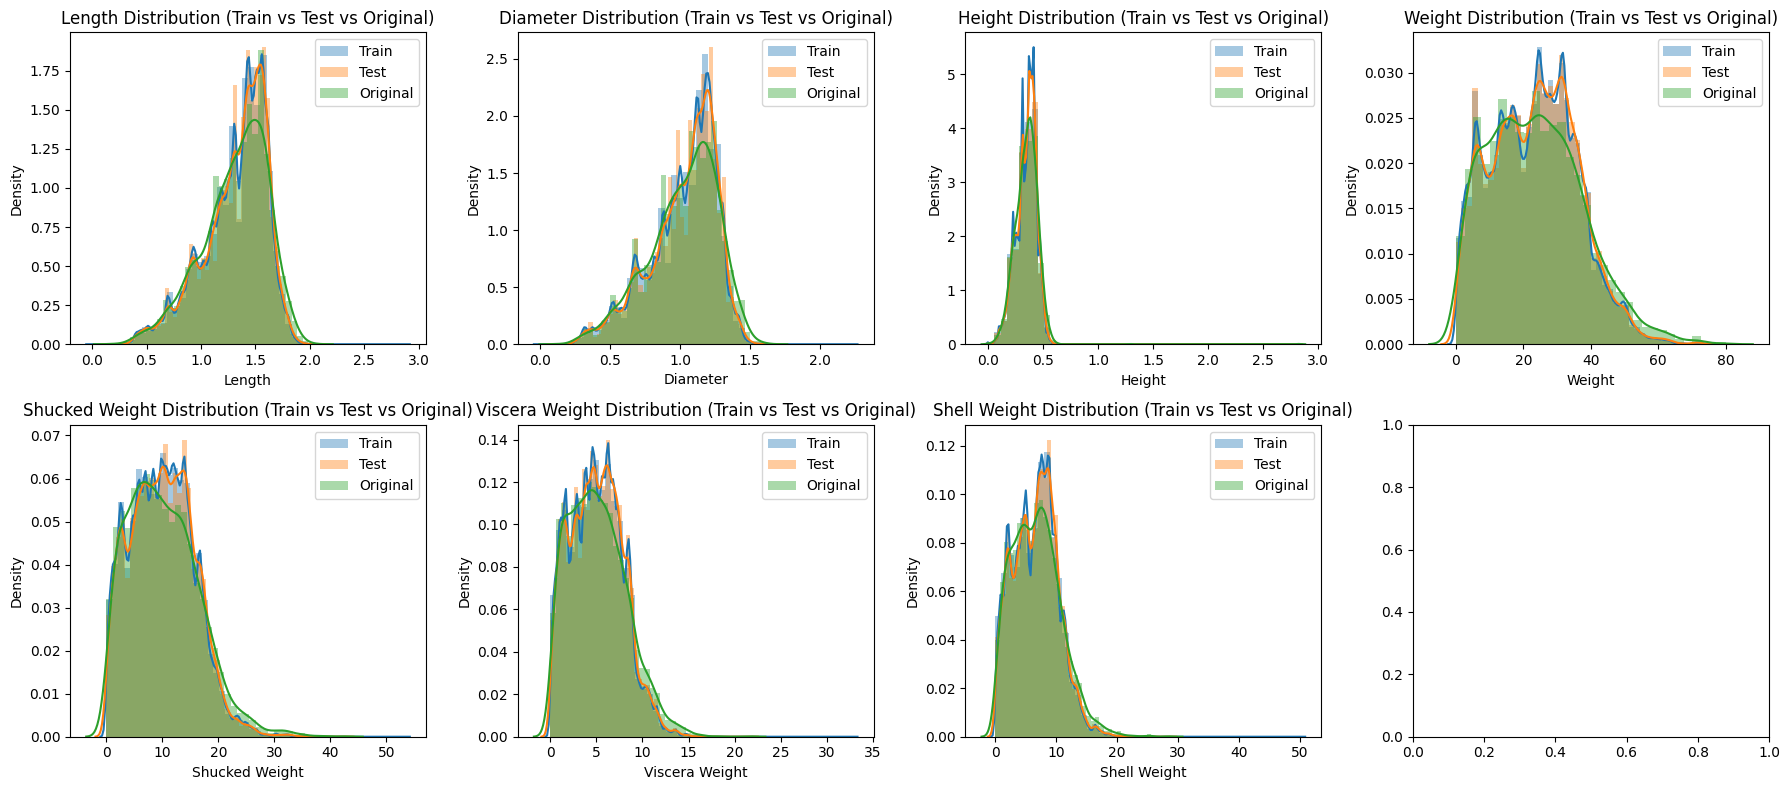

In [5]:
def plot_histograms(df_train, df_test, original, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            sns.distplot(original[var_name], kde=True, ax=ax, label='Original')
            ax.set_title(f'{var_name} Distribution (Train vs Test vs Original)')
            ax.legend()

    plt.tight_layout()
    plt.show()

if CFG.add_synthetics:
    plot_histograms(pd.concat([df_train , synthetic])[num_cols], df_test[num_cols], original[num_cols], target_col, n_cols=4)
else:
    plot_histograms(df_train[num_cols], df_test[num_cols], original[num_cols], target_col, n_cols=4)

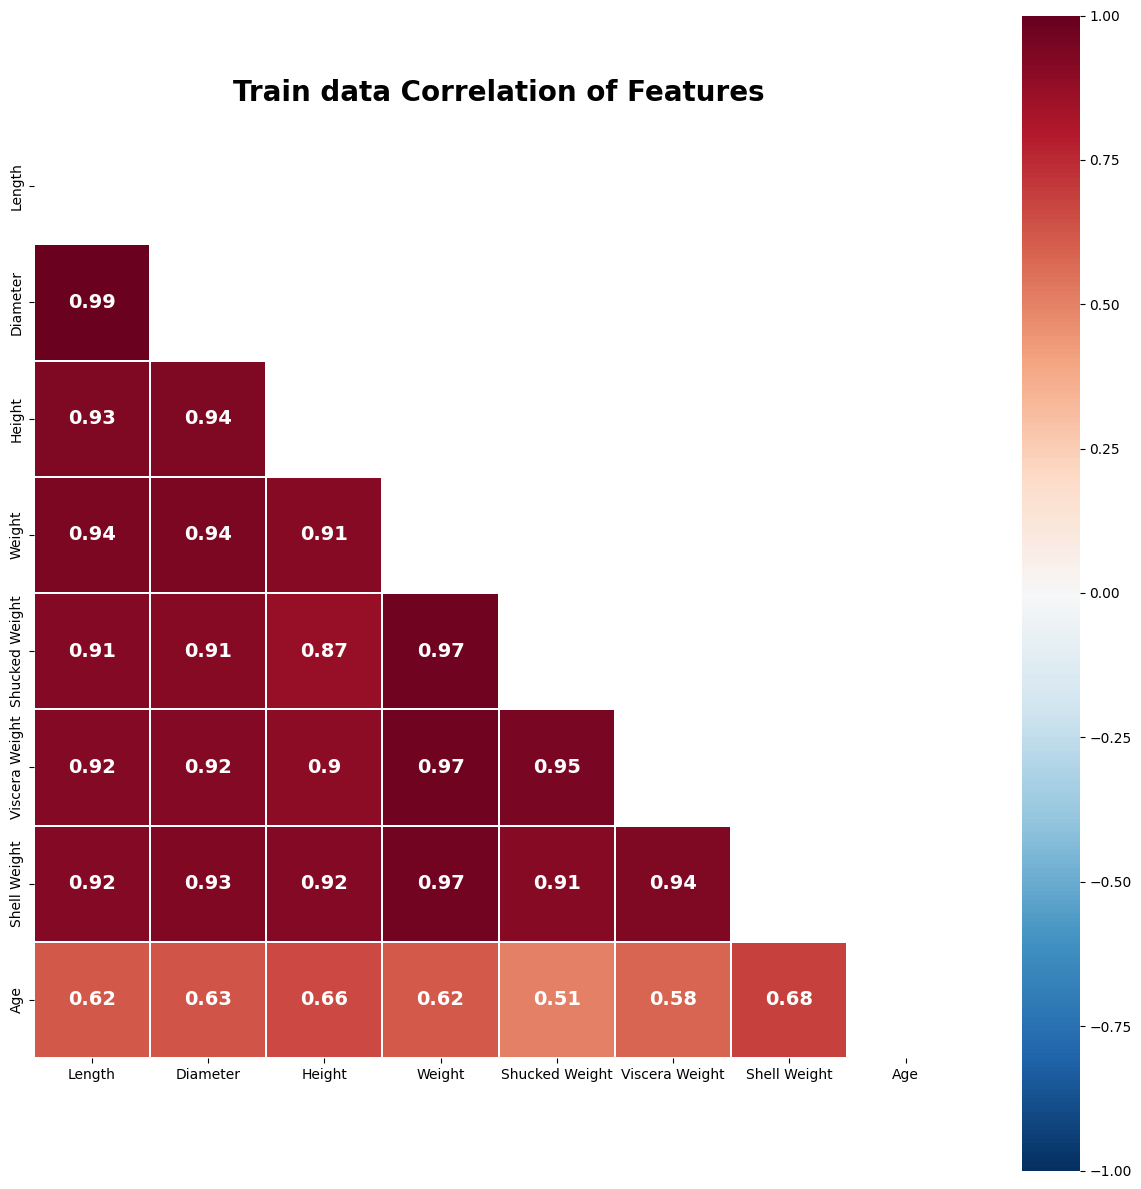

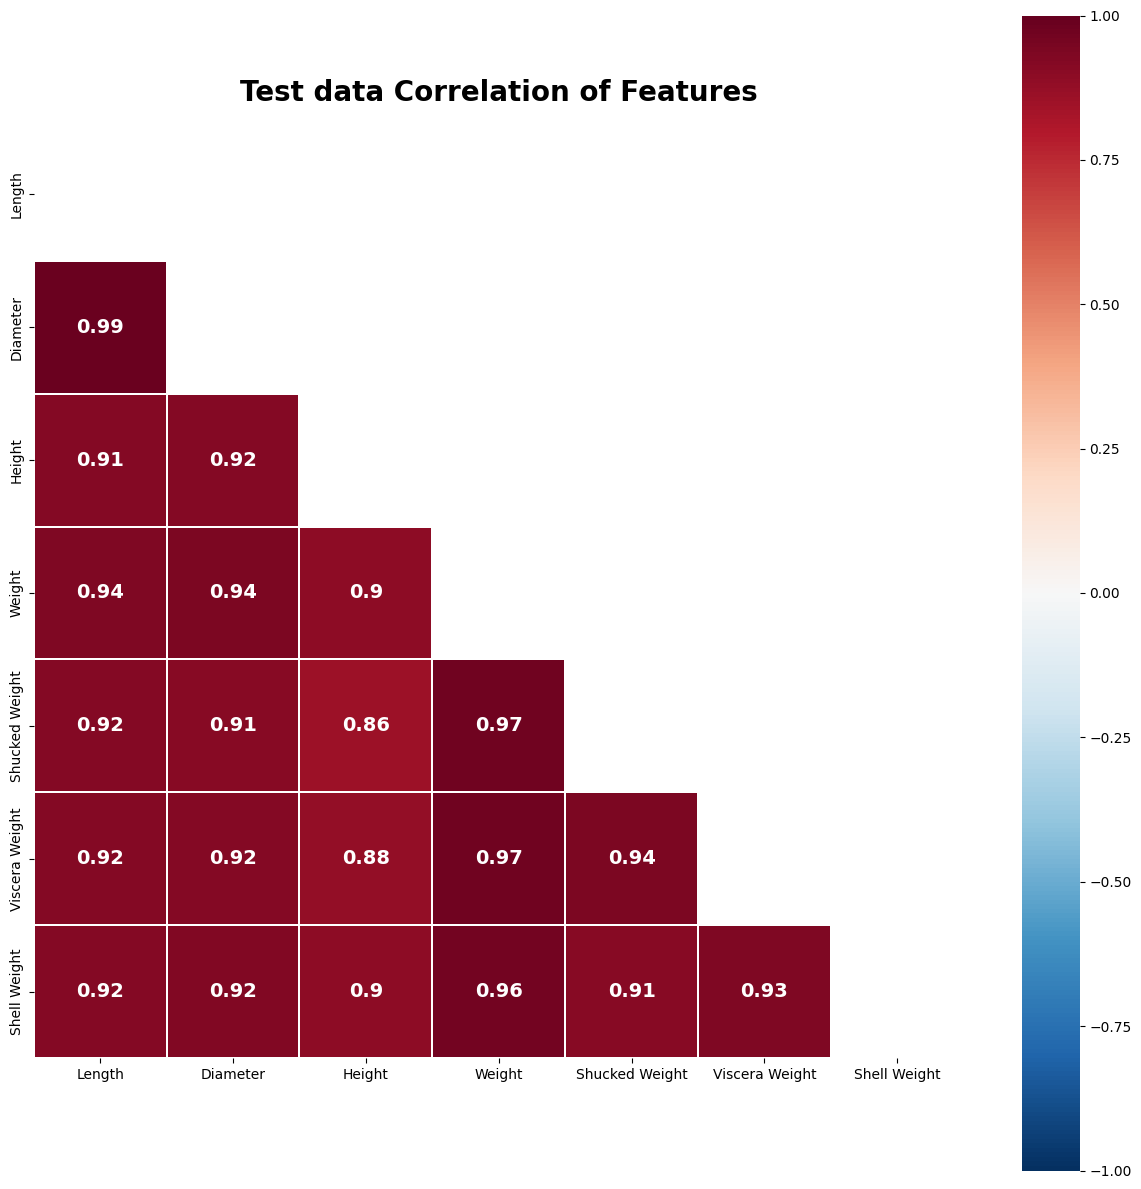

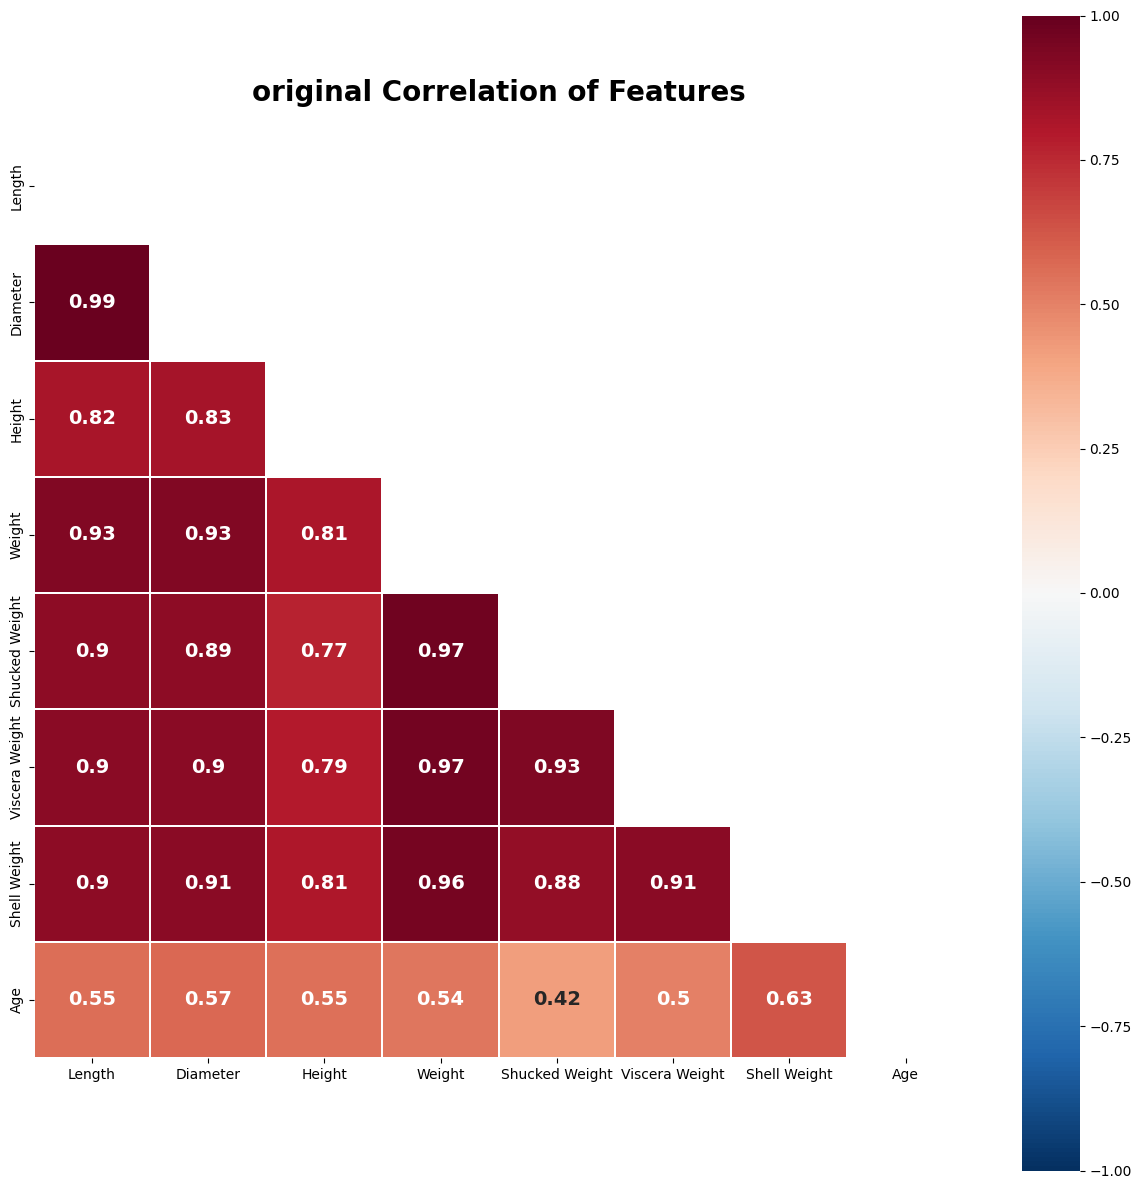

In [6]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

if CFG.add_synthetics:
    plot_heatmap(pd.concat([df_train , synthetic])[num_cols+[target_col]], title='Train data')
else:
    plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
plot_heatmap(original[num_cols+[target_col]], title='original')

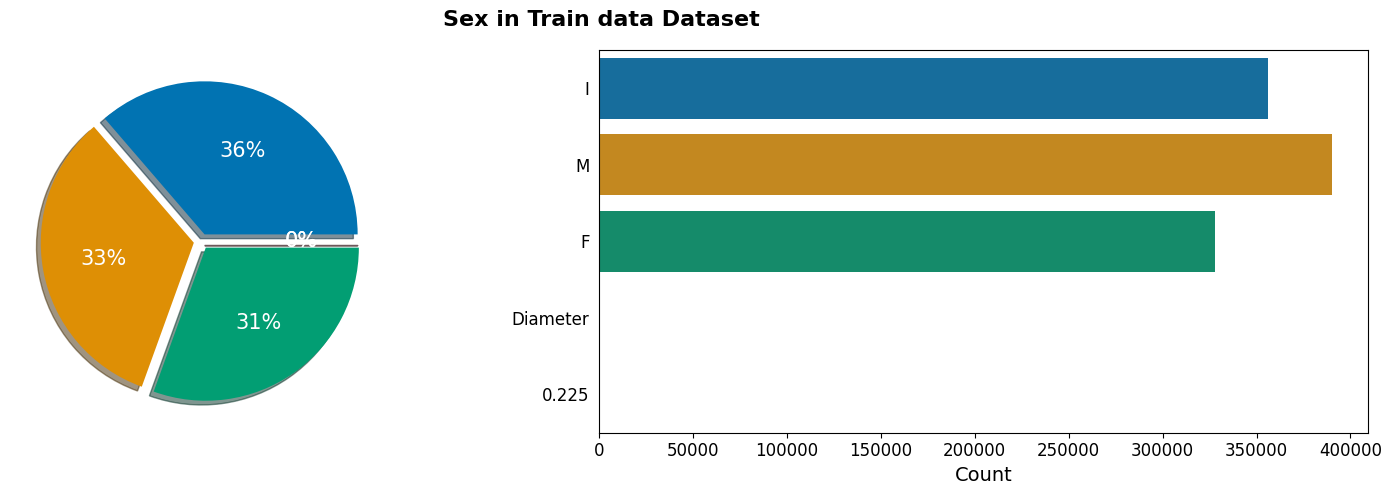

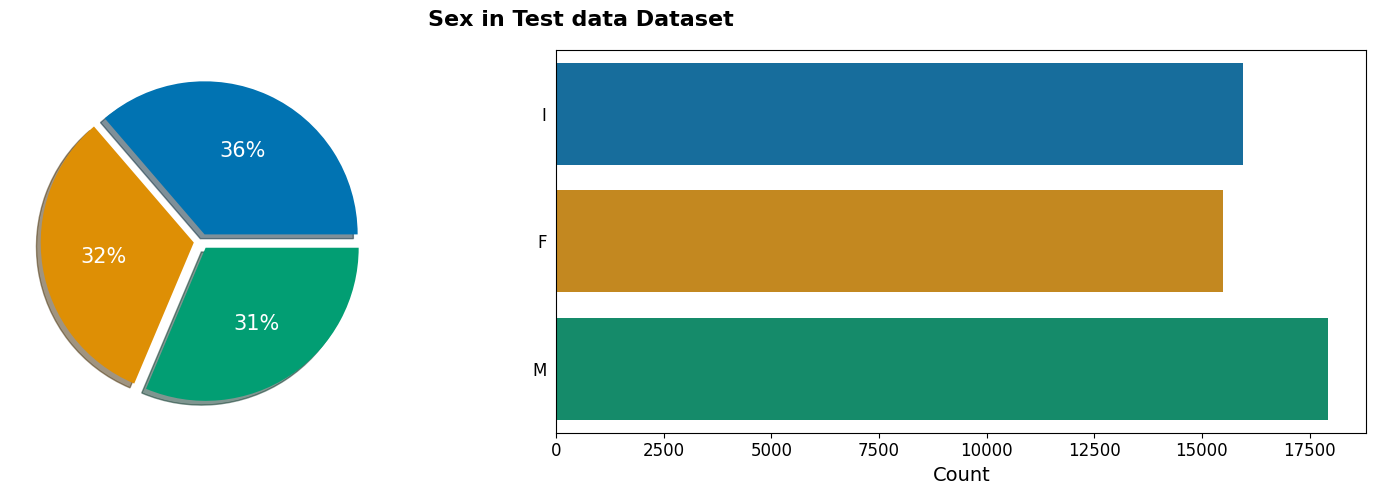

In [7]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

if CFG.add_synthetics:  
    plot_target_feature(pd.concat([df_train,synthetic]), 'Sex', figsize=(16,5), palette='colorblind', name='Train data')
else:
    plot_target_feature(df_train, 'Sex', figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, 'Sex', figsize=(16,5), palette='colorblind', name='Test data')

In [8]:
synthetic['Sex'].value_counts()

Sex
M           362980
I           332194
F           304824
Diameter         1
0.225            1
Name: count, dtype: int64

In [9]:
df_train['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

In [10]:
synthetic = synthetic.drop(synthetic[synthetic['Sex'].isin(['Diameter' , '0.225'])].index)

In [11]:
synthetic['Sex'].value_counts()

Sex
M    362980
I    332194
F    304824
Name: count, dtype: int64

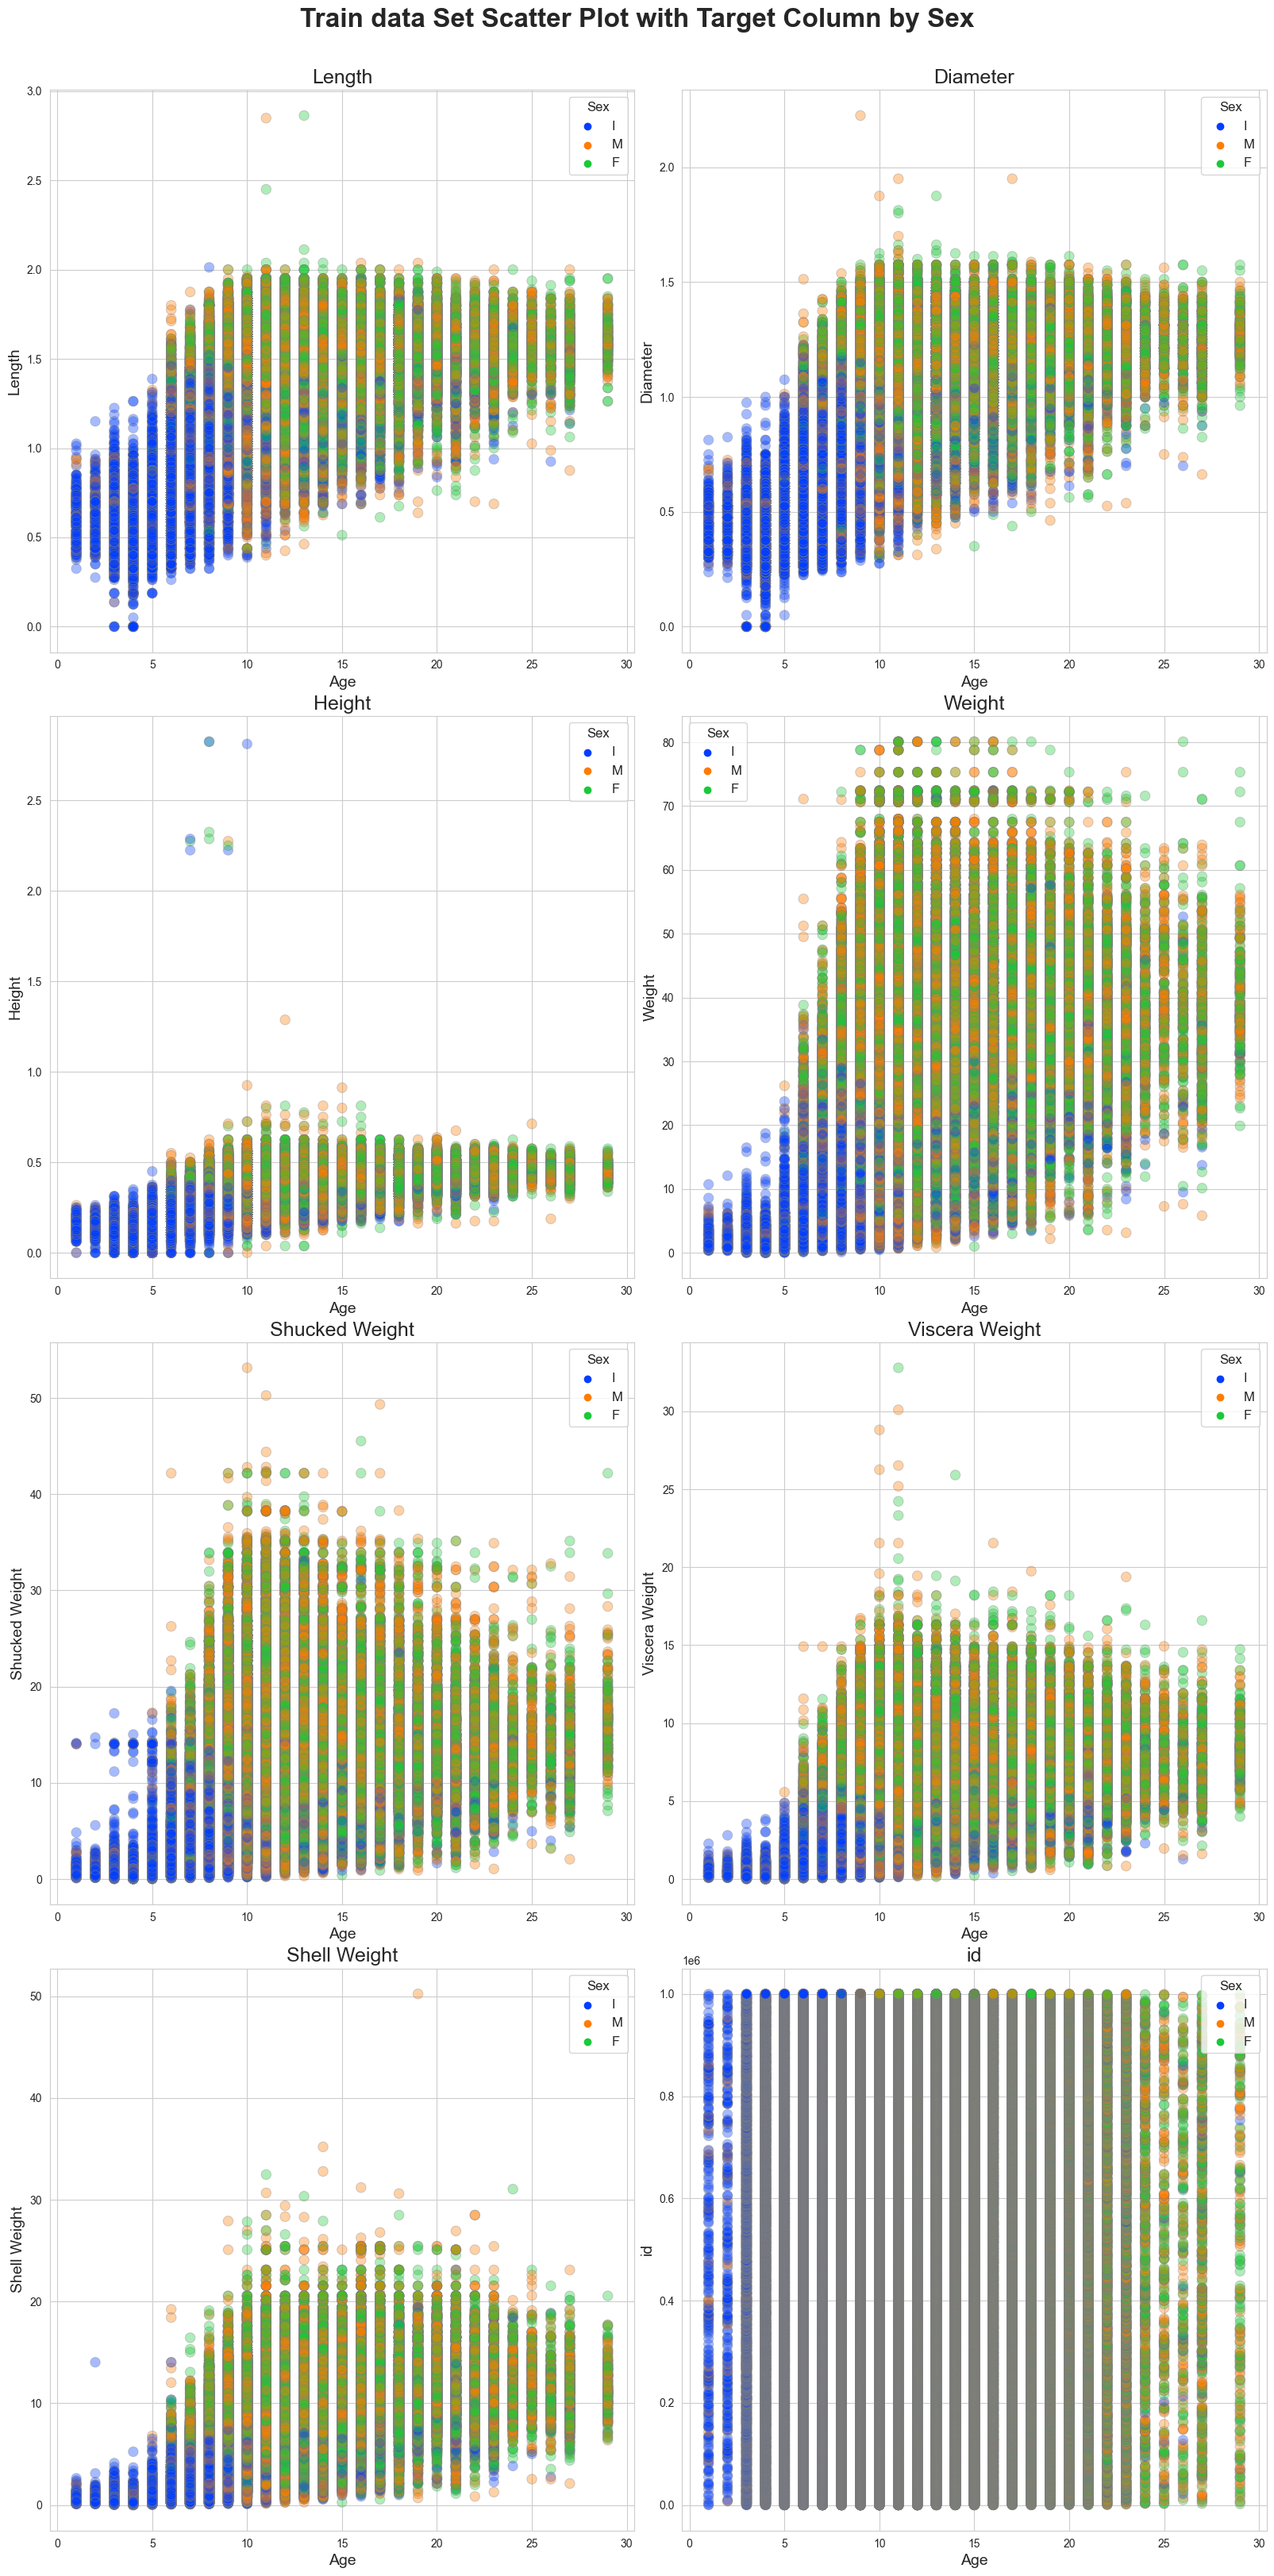

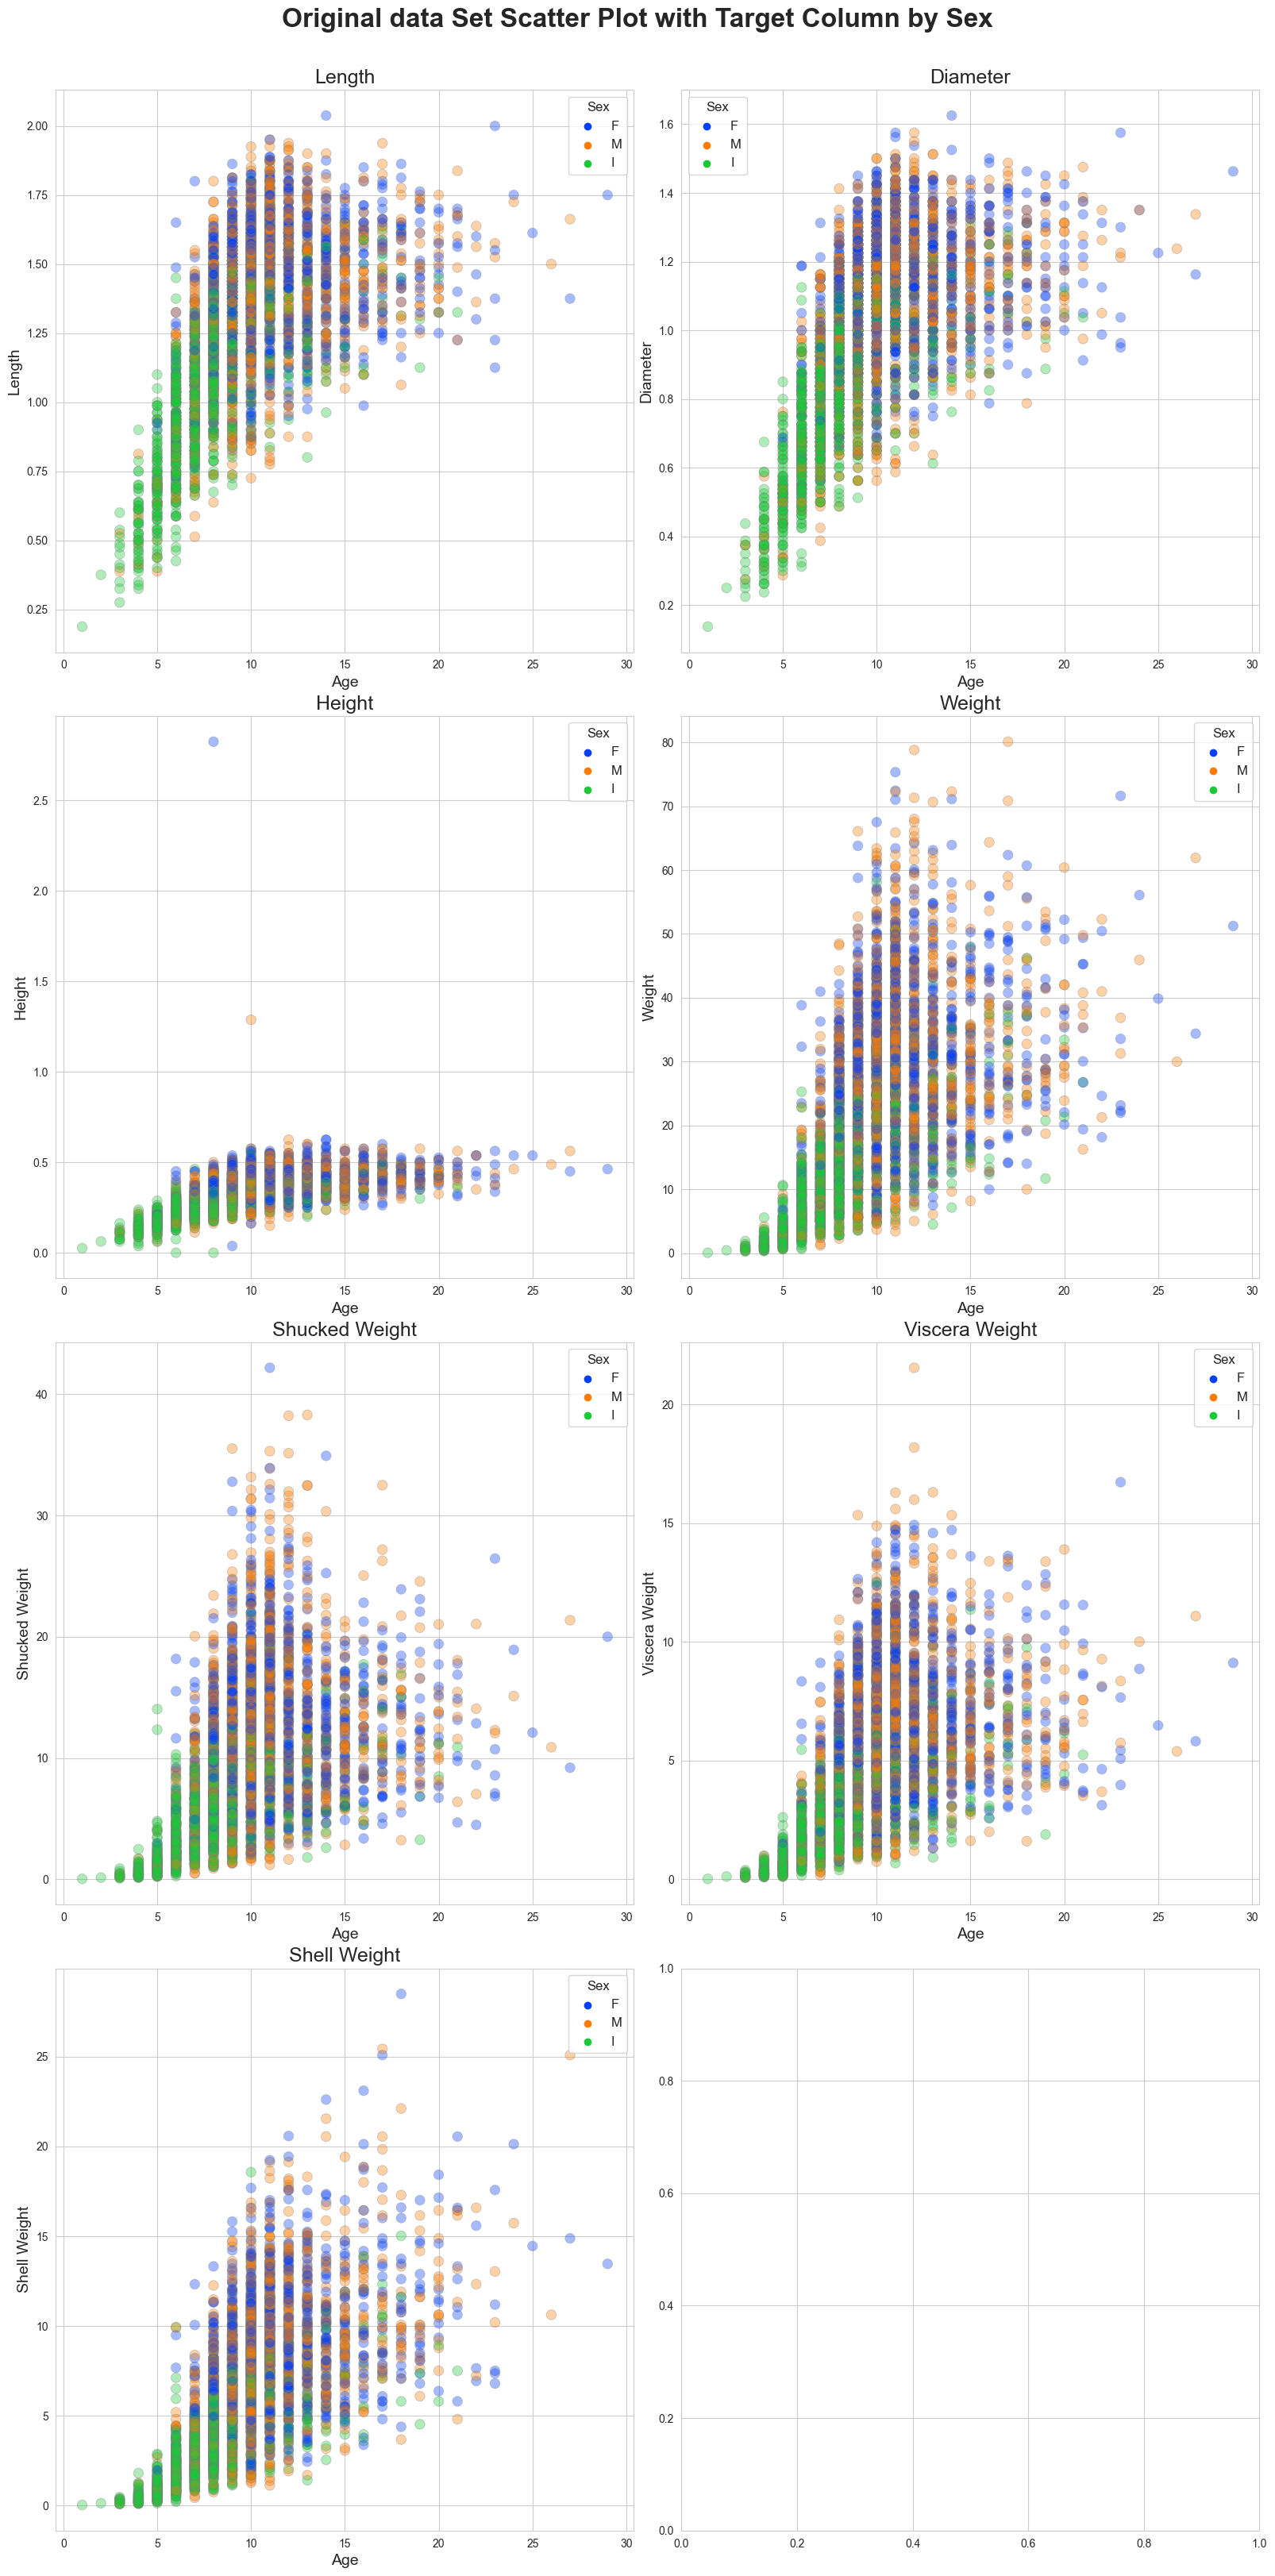

In [12]:
def plot_scatter_with_fixed_col(df, fixed_col, hue=False, drop_cols=[], size=10, title=''):
    sns.set_style('whitegrid')
    
    if hue:
        cols = df.columns.drop([hue, fixed_col] + drop_cols)
    else:
        cols = df.columns.drop([fixed_col] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(size, size/n_cols*n_rows), sharex=False, sharey=False)
    fig.suptitle(f'{title} Set Scatter Plot with Target Column by {hue}', fontsize=24, fontweight='bold', y=1.01)

    for i, col in enumerate(cols):
        n_row = i // n_cols
        n_col = i % n_cols
        ax = axes[n_row, n_col]

        ax.set_xlabel(f'{fixed_col}', fontsize=14)  # Değişiklik burada
        ax.set_ylabel(f'{col}', fontsize=14)  # Değişiklik burada

        # Plot the scatterplot
        if hue:
            sns.scatterplot(data=df, x=fixed_col, y=col, hue=hue, ax=ax,  # Değişiklik burada
                            s=80, edgecolor='gray', alpha=0.35, palette='bright')
            ax.legend(title=hue, title_fontsize=12, fontsize=12)  # loc='upper right'
        else:
            sns.scatterplot(data=df, x=fixed_col, y=col, ax=ax,  # Değişiklik burada
                            s=80, edgecolor='gray', alpha=0.35)

        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f'{col}', fontsize=18)
    
    plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
    plt.show()

if CFG.add_synthetics:    
    plot_scatter_with_fixed_col(pd.concat([df_train, synthetic] , axis = 0), fixed_col=target_col, hue='Sex', size=16, title='Train data')
else:
    plot_scatter_with_fixed_col(df_train, fixed_col=target_col, hue='Sex', size=16, title='Train data')
plot_scatter_with_fixed_col(original, fixed_col=target_col, hue='Sex', size=16, title='Original data')


* Sex "I" might be children. When Sex is I, there is lower features.
* There is some outliers. Escepially in Height. 
* You should consider drop Height more than 2 or maybe 1
* You should consider drop Shell Weight more than 50
* You should consider drop Shucked Weight more than 45
* You should consider drop Length more than 2.3
* You should consider drop Diameter more than 2
* You should consider drop Viscera Weight more than 25 or maybe 20

In [13]:
# # For Continous target col

# def plot_scatter_with_fixed_col(df, fixed_col, hue=False, drop_cols=[], size=10, title=''):
#     sns.set_style('whitegrid')
    
#     if hue:
#         cols = df.columns.drop([hue, fixed_col] + drop_cols)
#     else:
#         cols = df.columns.drop([fixed_col] + drop_cols)
#     n_cols = 2
#     n_rows = (len(cols) - 1) // n_cols + 1
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(size, size/n_cols*n_rows), sharex=False, sharey=False)
#     fig.suptitle(f'{title} Set Scatter Plot with Target Column by {hue}', fontsize=24, fontweight='bold', y=1.01)

#     for i, col in enumerate(cols):
#         n_row = i // n_cols
#         n_col = i % n_cols
#         ax = axes[n_row, n_col]

#         ax.set_xlabel(f'{col}', fontsize=14)
#         ax.set_ylabel(f'{fixed_col}', fontsize=14)

#         # Plot the scatterplot
#         if hue:
#             sns.scatterplot(data=df, x=col, y=fixed_col, hue=hue, ax=ax,
#                             s=80, edgecolor='gray', alpha=0.35, palette='bright')
#             ax.legend(title=hue, title_fontsize=12, fontsize=12) # loc='upper right'
#         else:
#             sns.scatterplot(data=df, x=col, y=fixed_col, ax=ax,
#                             s=80, edgecolor='gray', alpha=0.35)

#         ax.tick_params(axis='both', which='major', labelsize=10)
#         ax.set_title(f'{col}', fontsize=18)
    
#     plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5)
#     plt.show()
    
# if CFG.add_synthetics:    
#     plot_scatter_with_fixed_col(pd.concat([df_train, synthetic] , axis = 0), fixed_col=target_col, hue='Sex', size=16, title='Train data')
# else:
#     plot_scatter_with_fixed_col(df_train, fixed_col=target_col, hue='Sex', size=16, title='Train data')
# plot_scatter_with_fixed_col(original, fixed_col=target_col, hue='Sex', size=16, title='Original data')

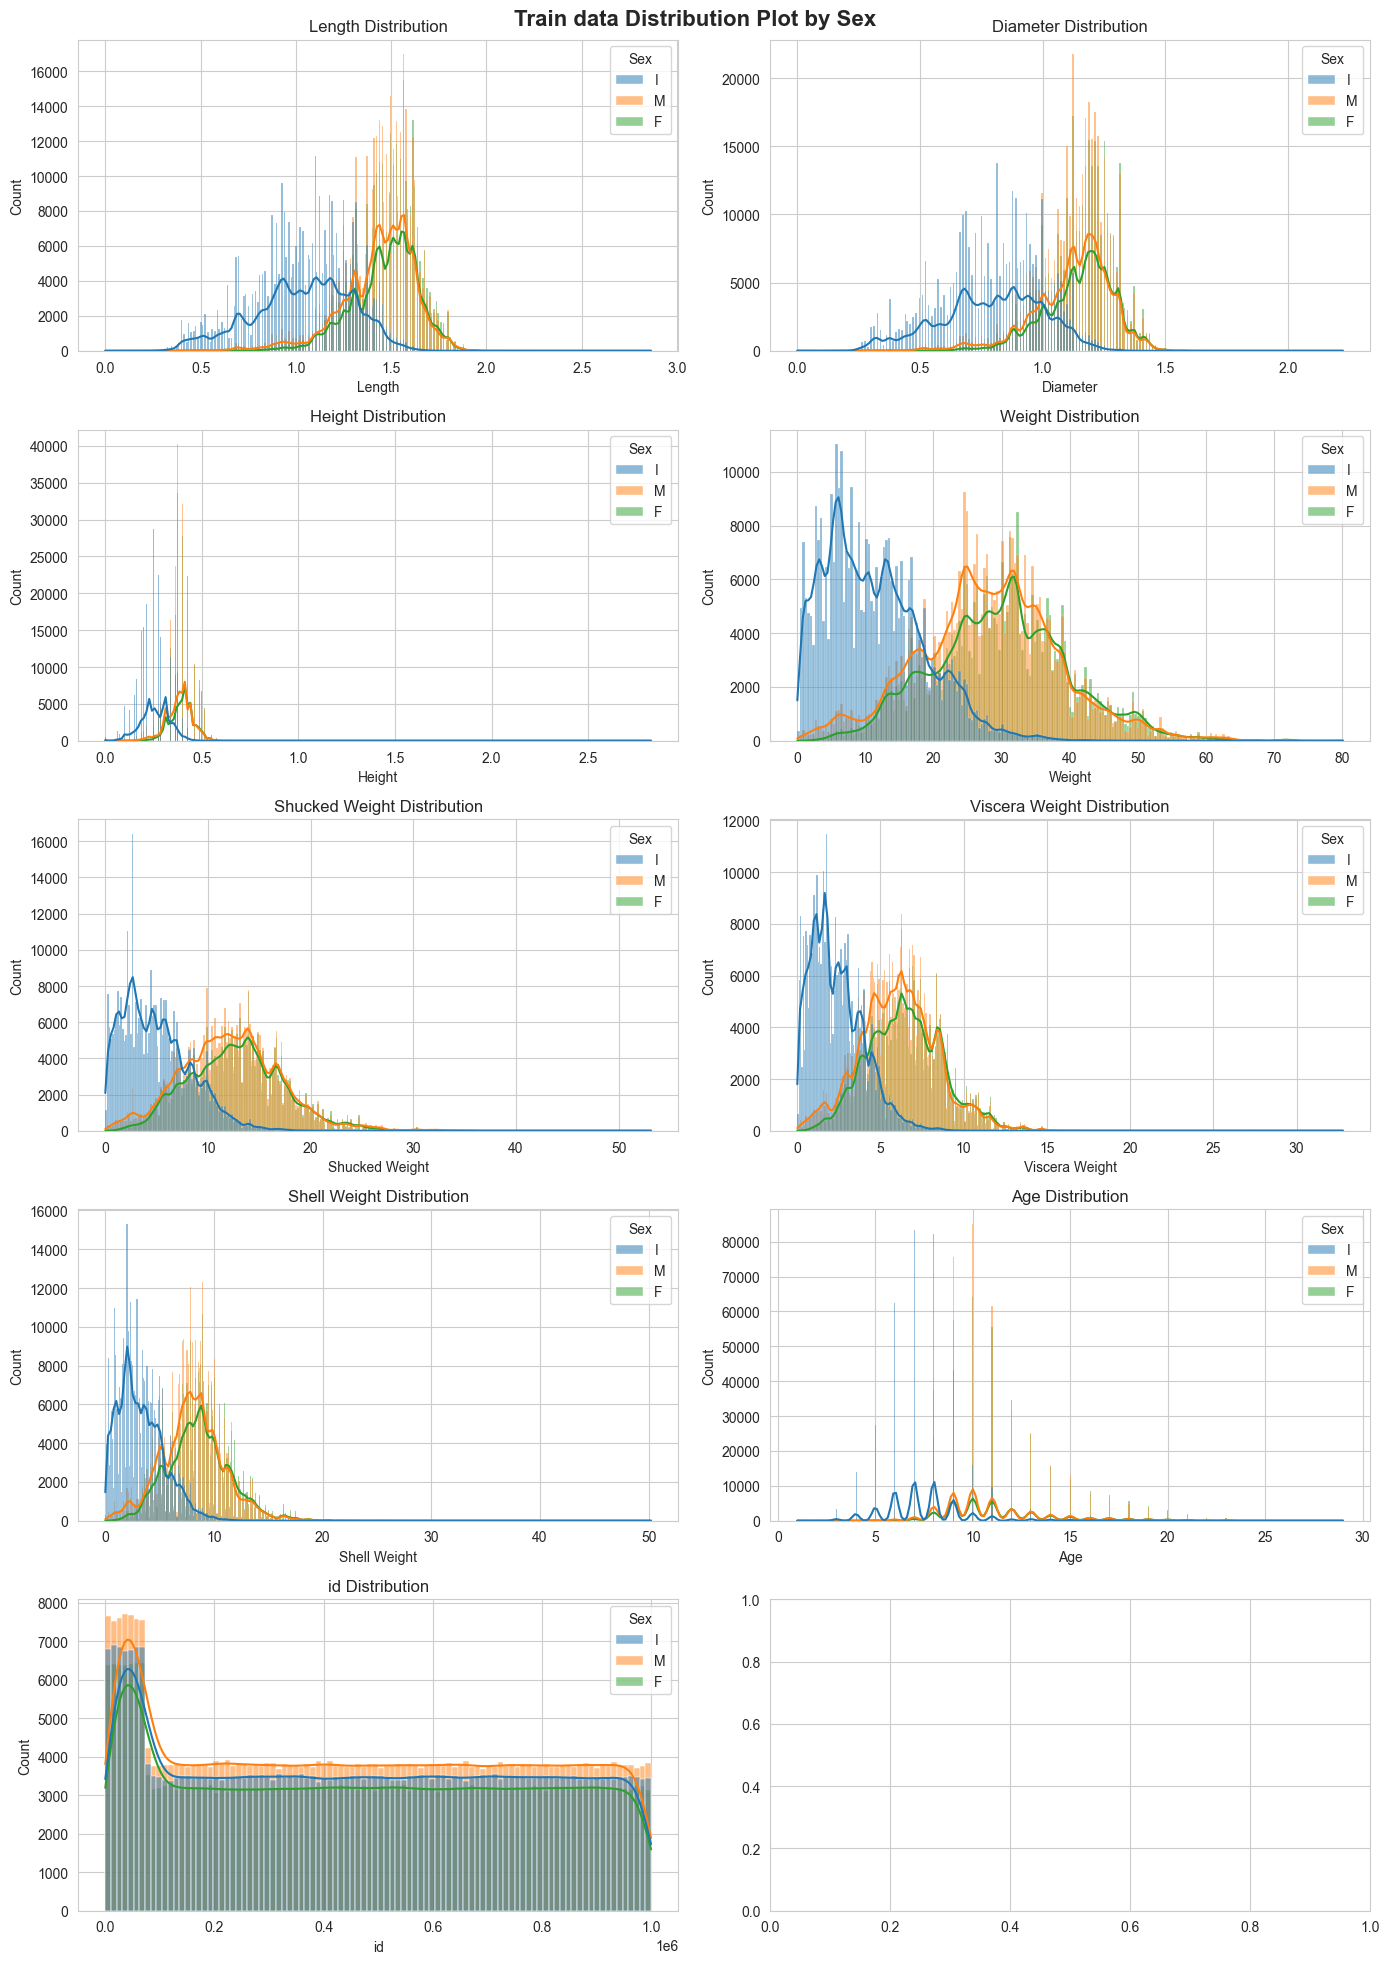

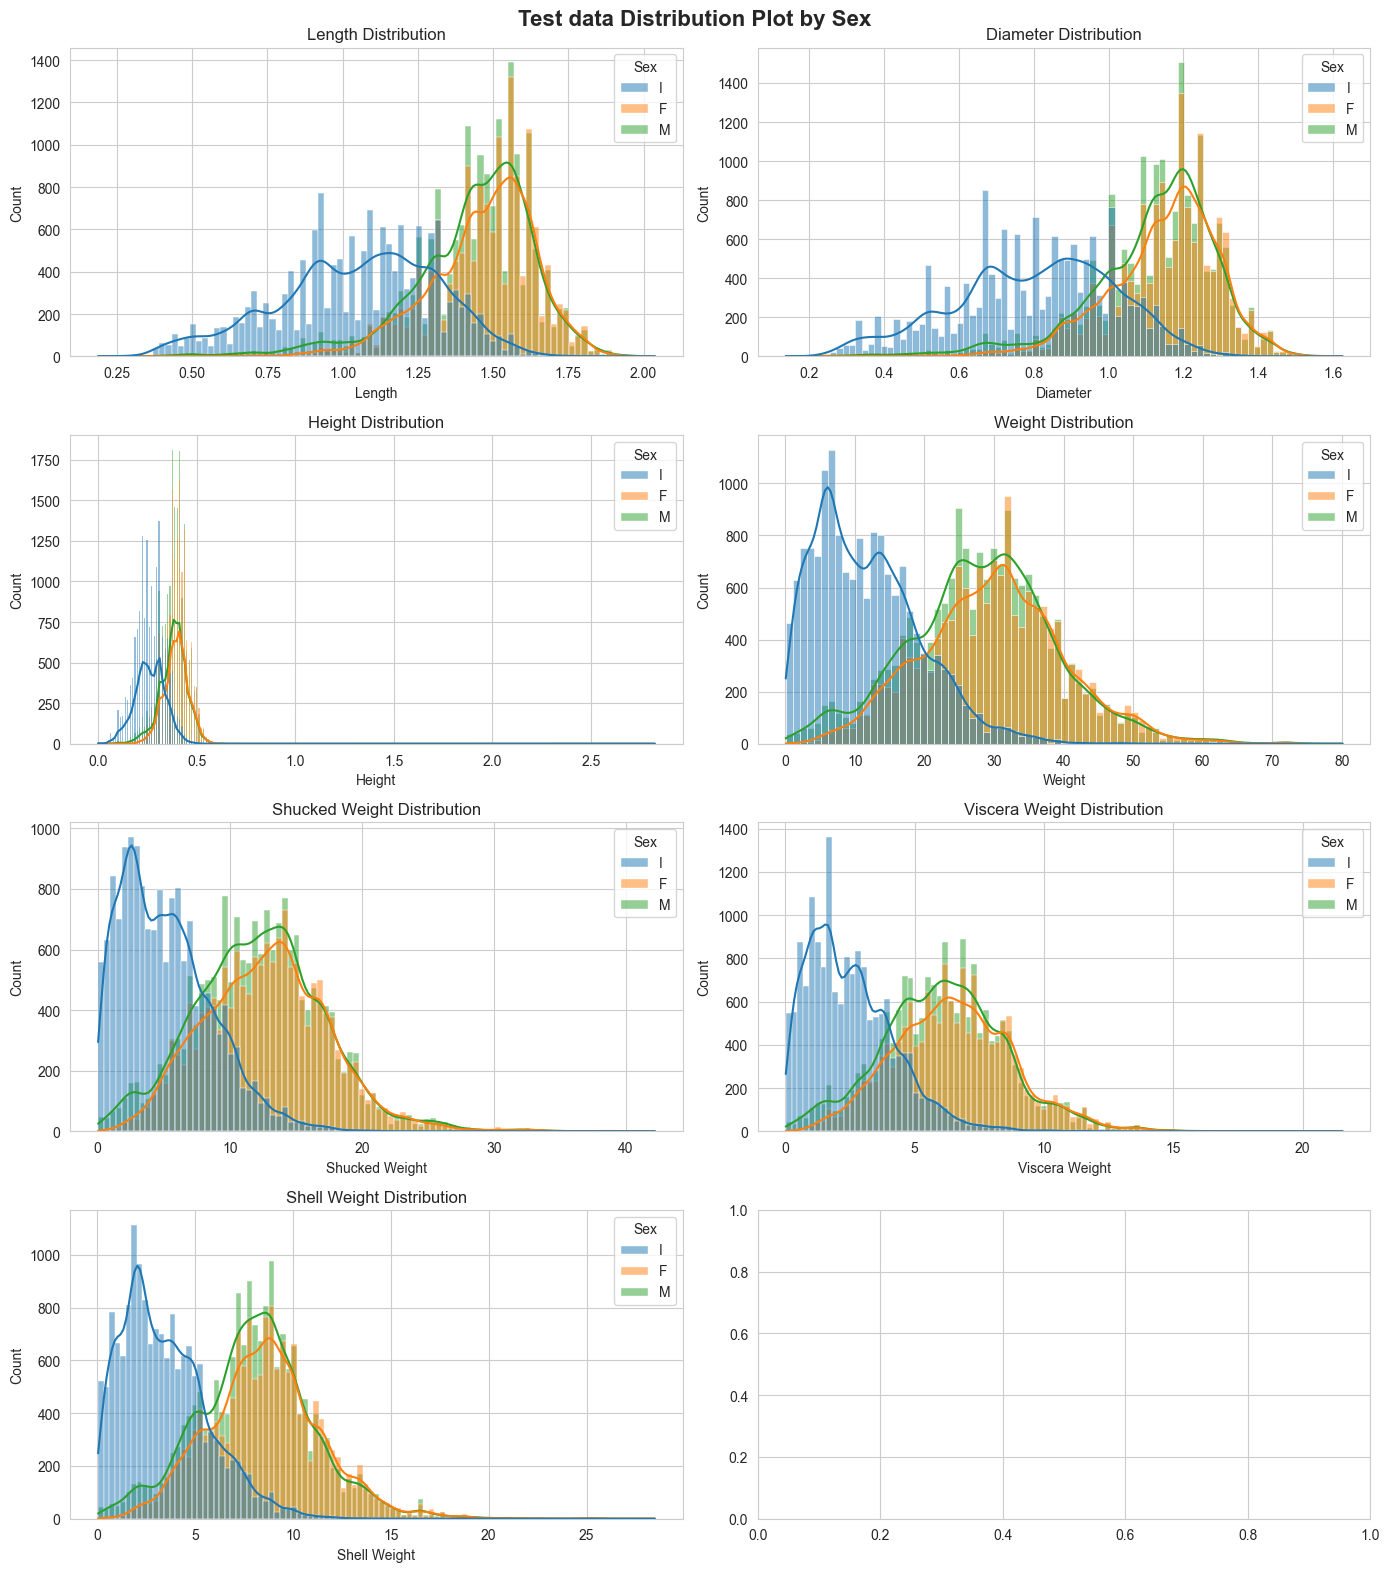

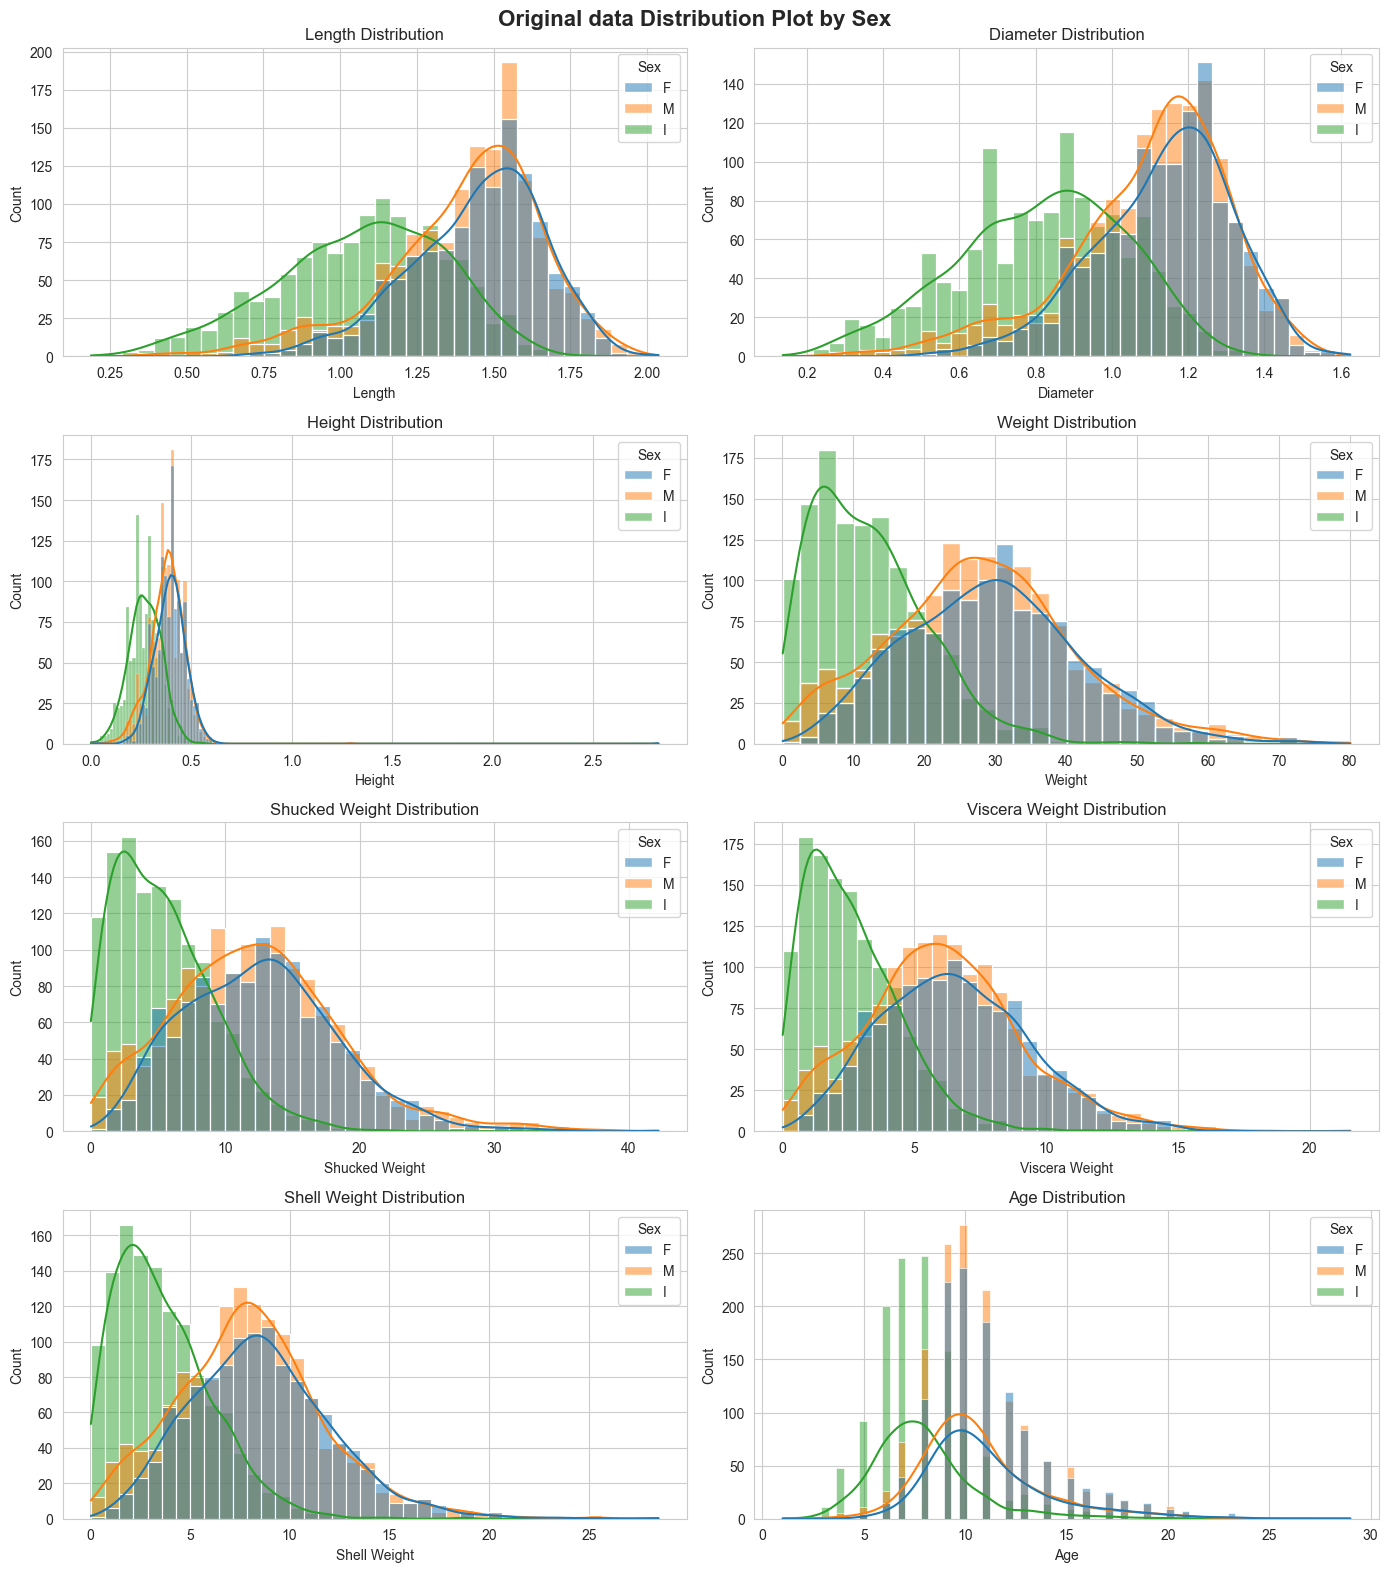

In [14]:
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    
if CFG.add_synthetics:    
    plot_distribution(pd.concat([df_train , synthetic]), hue='Sex', title='Train data')
else:
    plot_distribution(df_train, hue='Sex', title='Train data')
    
plot_distribution(df_test, hue='Sex', title='Test data')
plot_distribution(original, hue='Sex', title='Original data')

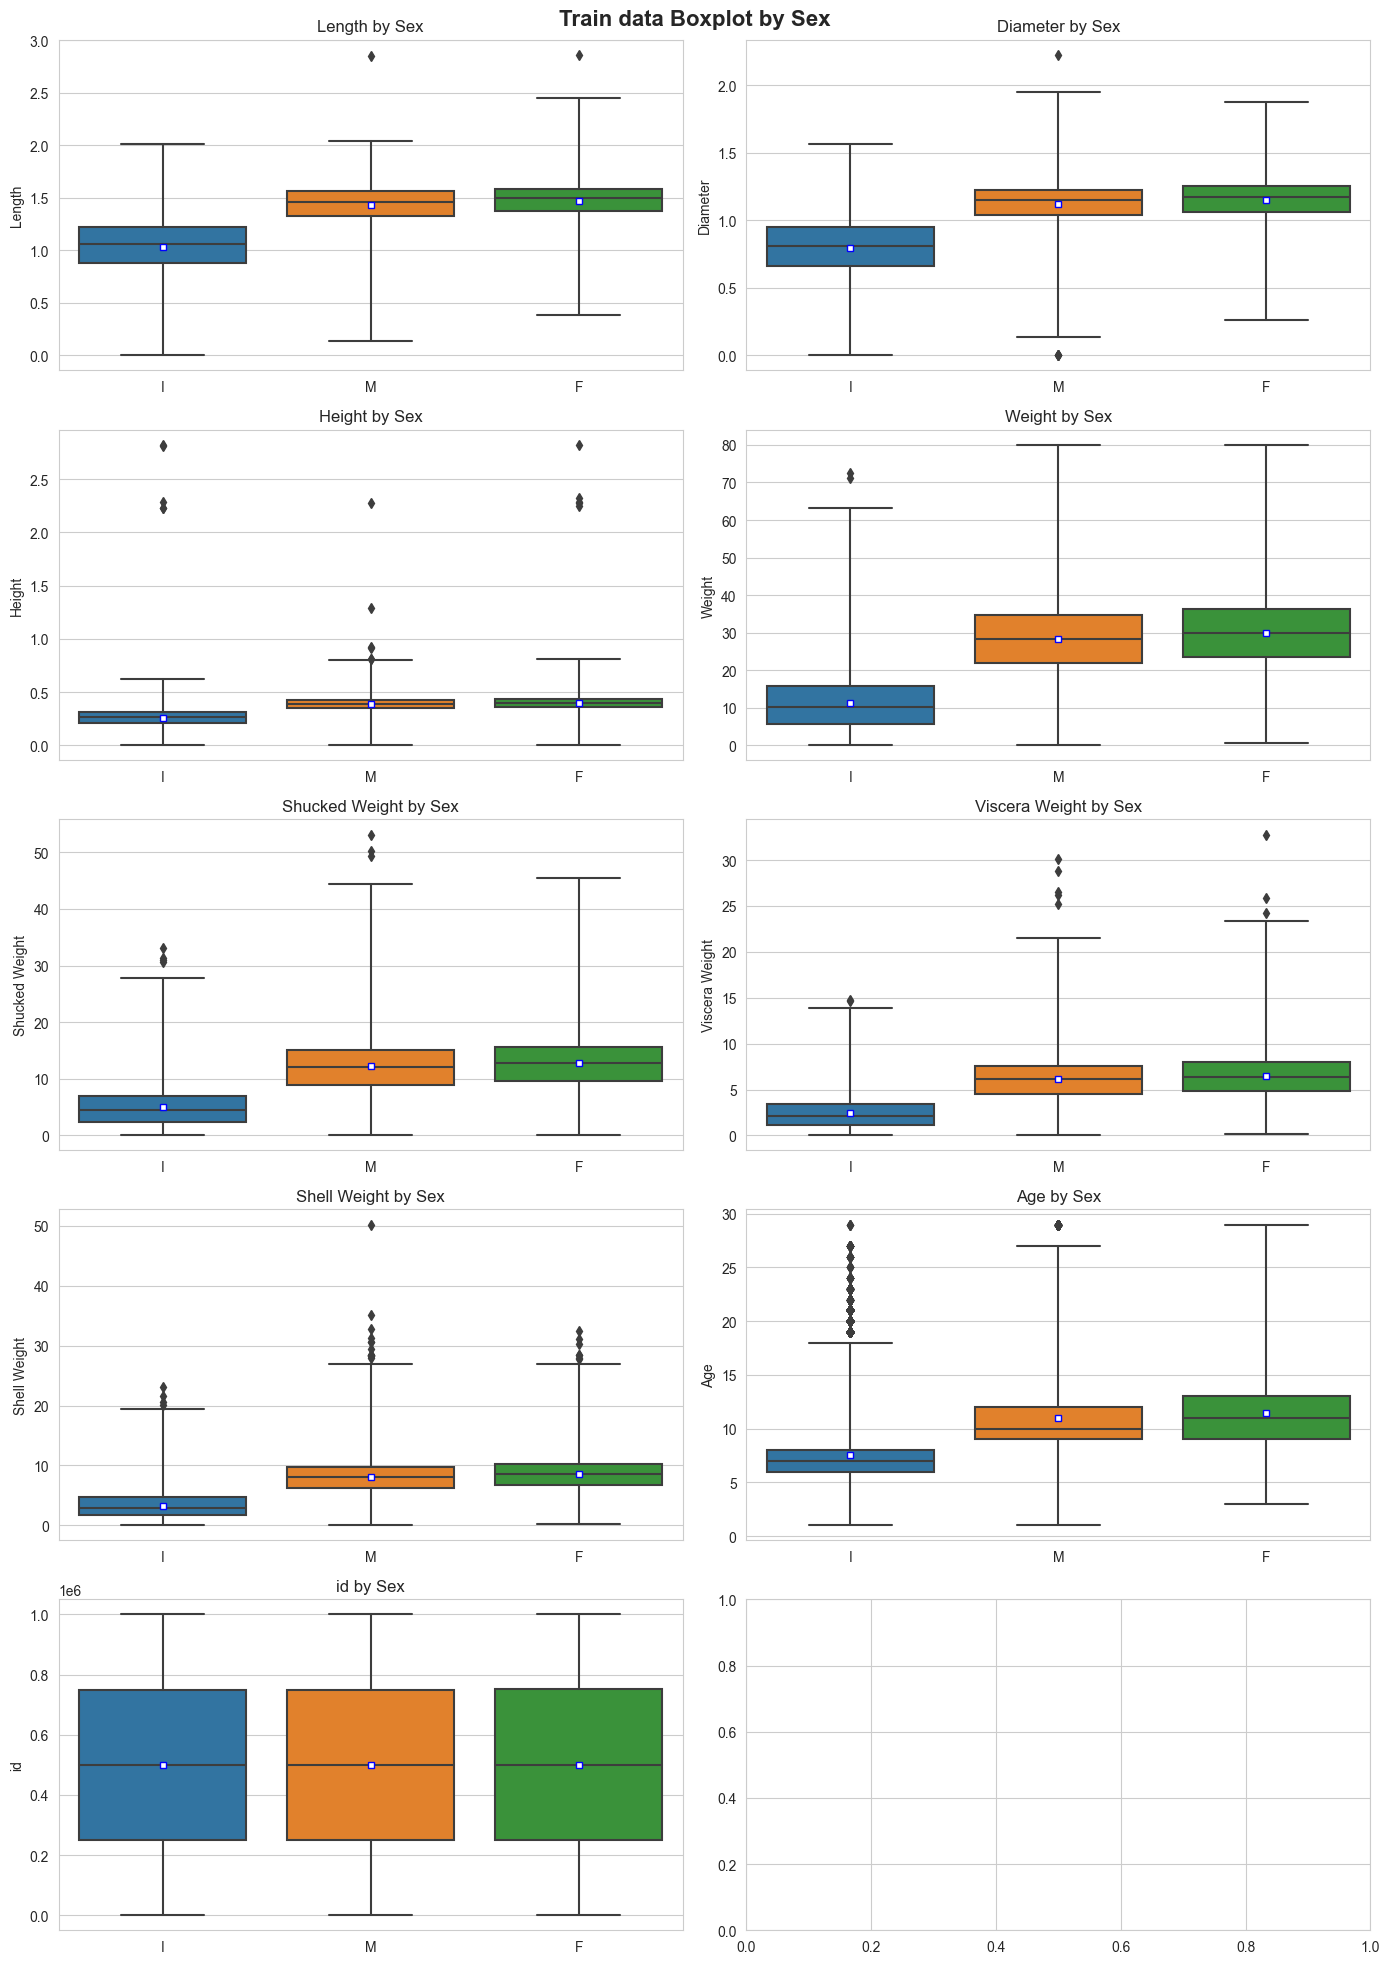

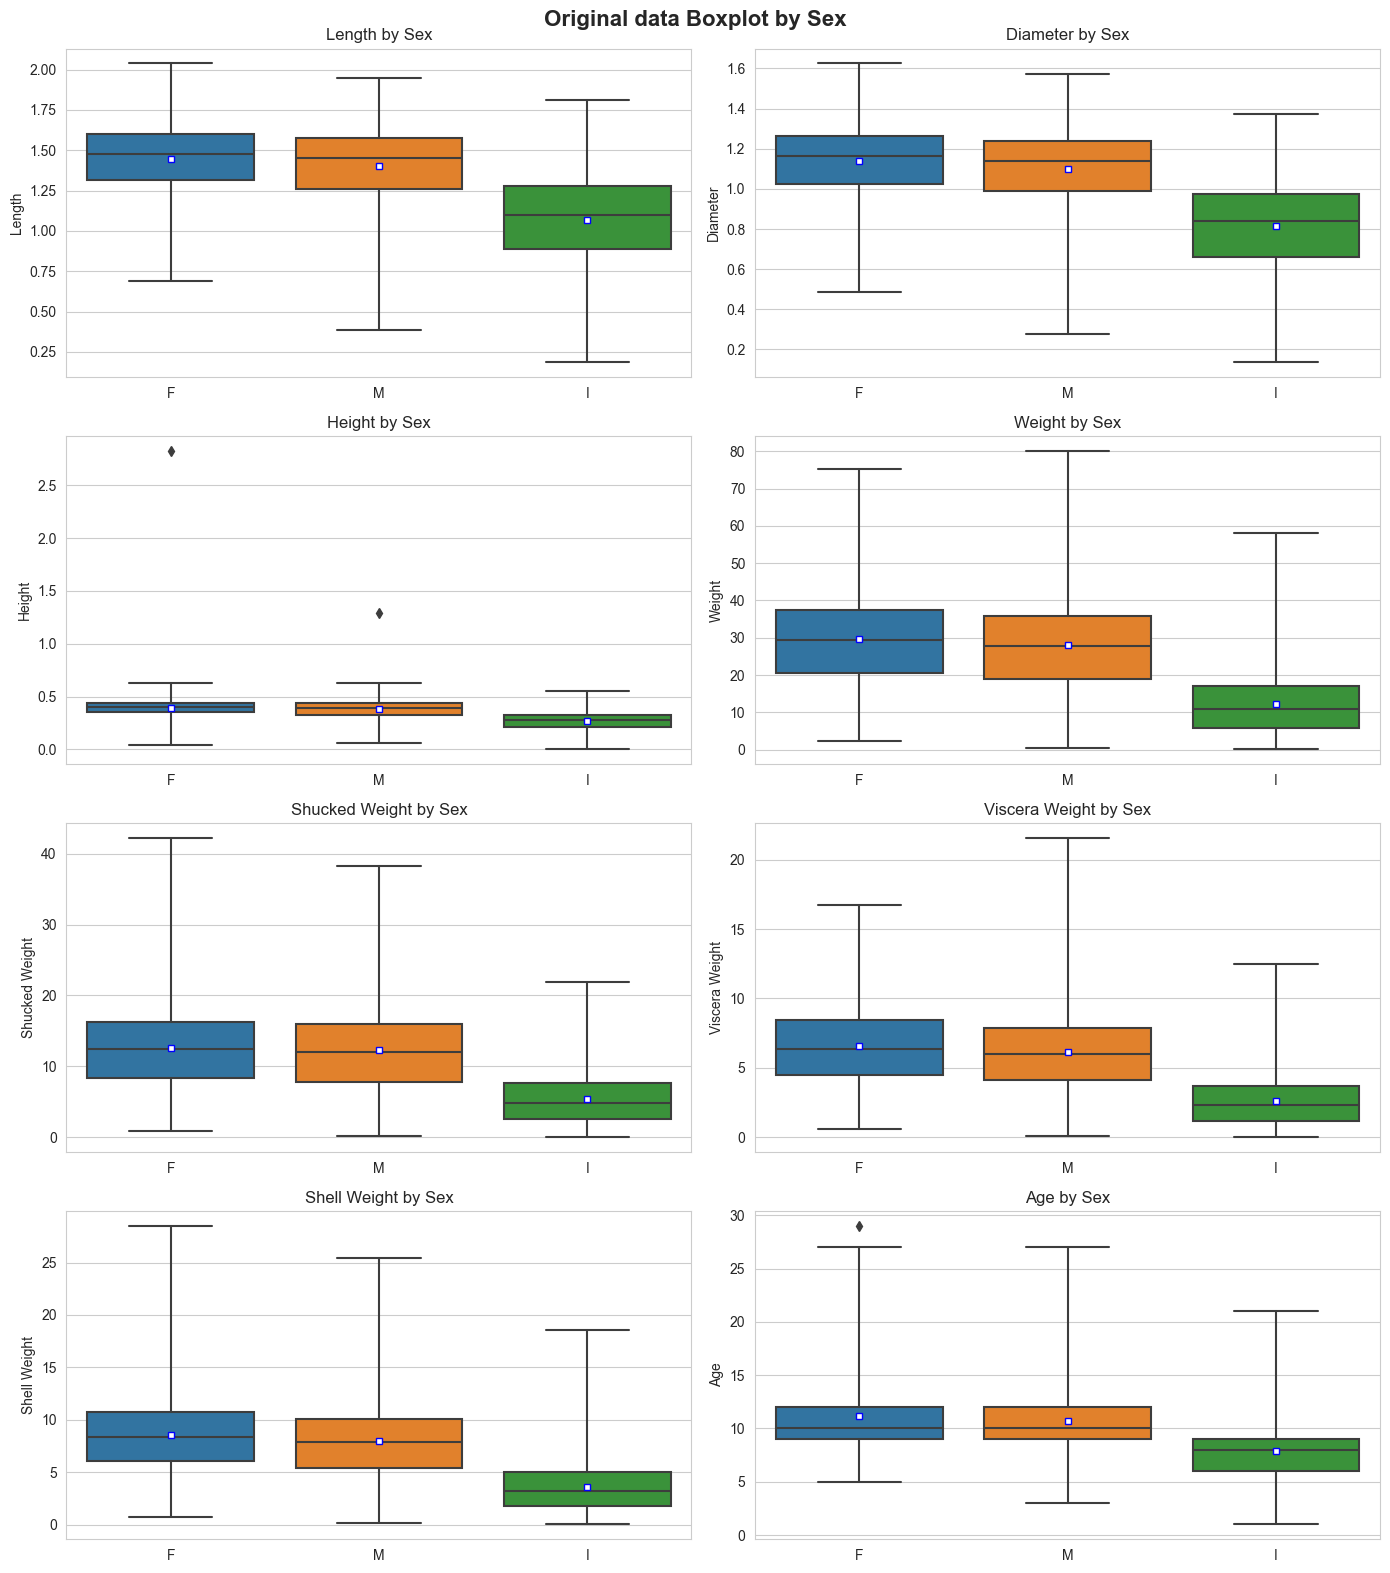

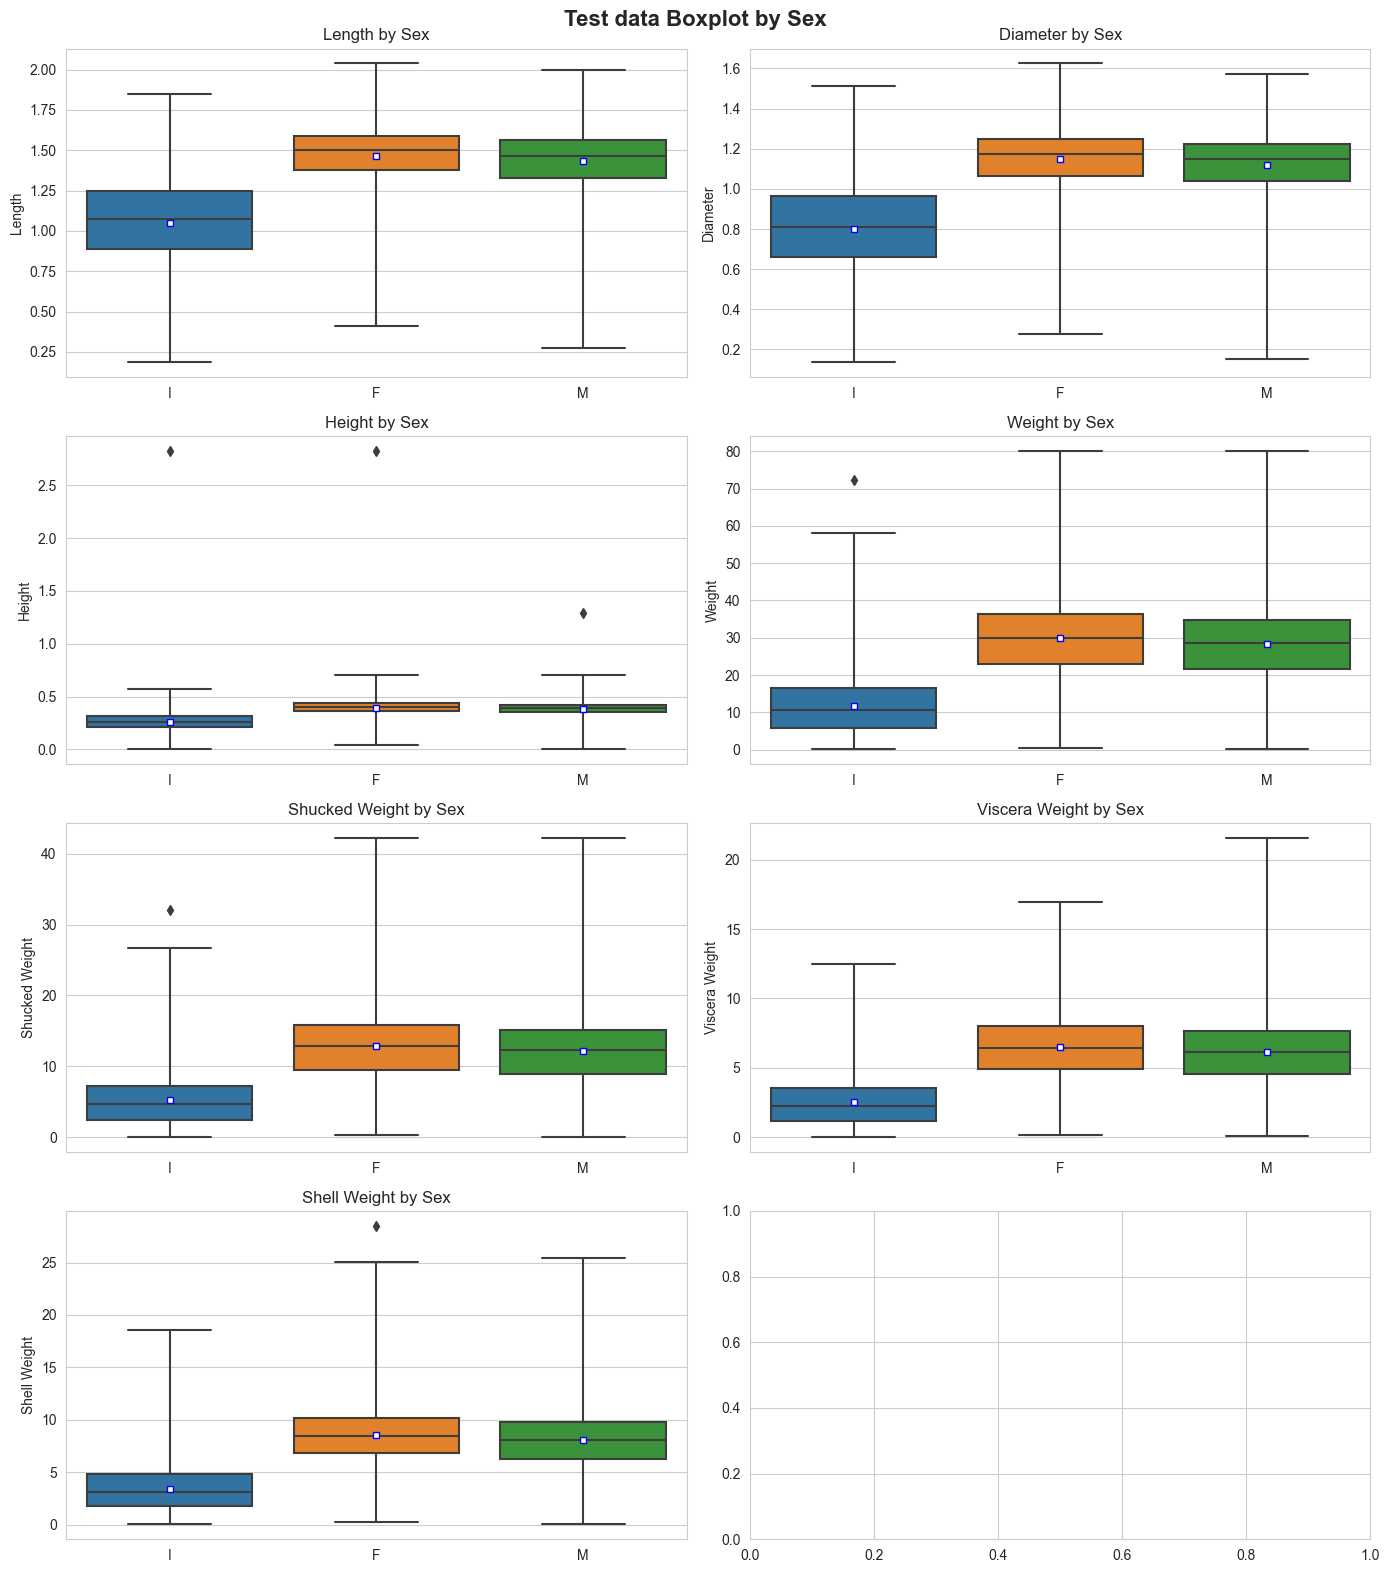

In [31]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name,whis= 5 ,  ax=ax, showmeans=True, 
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

if CFG.add_synthetics:    
    plot_boxplot(pd.concat([df_train , synthetic]), hue='Sex', title='Train data', n_cols=2)
else:
    plot_boxplot(df_train, hue='Sex', title='Train data', n_cols=2)
    
plot_boxplot(original, hue='Sex', title='Original data', n_cols=2)
plot_boxplot(df_test, hue='Sex', title='Test data',  n_cols=2)

# Feature Engineering

I can't explain all of them. I just tried and tested the options that came to my mind one by one.

I added the features or applied the techniques that proved to have a positive effect.

Note: I haven't had a chance to test too much. I'm sure you can get better results with more tests.

In [16]:
# Choose the tactics
CFG.encoder = True
CFG.height_solver = True
CFG.scaler = True

CFG.mattop_post_process = True # Same positive Effect
CFG.rounded_process = False # Same positive Effect


# Choose the features
CFG.lenghtDiameterRatio_feature = False  # Negative Effect
CFG.LenMinusHeight_feature = False  # Negative Effect
CFG.WeightShellRatio_feature = False  # Positive Effect
CFG.Volume_feature = False  # Negative Effect
CFG.pseudoBMI_feature = False  # Negative Effect
CFG.Weight_to_Viscera_feature = False  # Negative Effect
CFG.Weight_to_ShuckedWeightRatio_feature = True  # Very Good Effect
CFG.LogDensity_feature = False  # No Effect



# Choose the techniques
CFG.object_to_category = False  # Slightly Negative Effect

CFG.add_pca_features = False  # Negative Effect

CFG.drop_outliers = True 

CFG.log_target_encoder = True  # Slightly Positive Effect

CFG.add_original = False  # Slightly Negative Effect

CFG.add_synthetics = True  # Very Good Effect

CFG.drop_bigAges = True  # Very Very Good Effect ### Crucial

CFG.drop_smallAges = True  # Slightly Negative Effect

CFG.drop_allAnomalys = True  # Slightly Negative Effect

CFG.revise_allAnomalys = False  # Slightly Negative Effect

CFG.largeScale = False  # No Effect



# Feature type choosing
CFG.ohe_cat_encoder = False
CFG.label_cat_encoder = True

CFG.height_solver_likeZero = True
CFG.height_solver_knn = False
CFG.height_solver_knnFeatures = False

CFG.standart_scaler = True  # This is better
CFG.minmax_scaler = False  # Slightly Worse

CFG.drop_Length = True 
CFG.drop_Diameter = True
CFG.drop_Height = True
CFG.drop_Weight = False
CFG.drop_Shucked_Weight = False
CFG.drop_Viscera_Weight = True
CFG.drop_Shell_Weight = True

# howFar0 = False
# howFar1 = False
# howFar2 = True
# howFar3 = False

## Functions

In [32]:
df_train.shape

(74051, 9)

In [33]:
synthetic.shape

(999998, 10)

In [34]:
def cat_encoder(X_train, X_test, cat_cols, encode='label'):
    
    if encode == 'label':
        ## Label Encoder
        encoder = OrdinalEncoder(cols=cat_cols, handle_missing='ignore')
        train_encoder = encoder.fit_transform(X_train[cat_cols]).astype(int)
        test_encoder = encoder.transform(X_test[cat_cols]).astype(int)
        X_train[cat_cols] = train_encoder[cat_cols]
        X_test[cat_cols] = test_encoder[cat_cols]
        encoder_cols = cat_cols
    
    else:
        ## OneHot Encoder
        encoder = OneHotEncoder(cols=cat_cols)
        train_encoder = encoder.fit_transform(X_train[cat_cols]).astype(int)
        test_encoder = encoder.transform(X_test[cat_cols]).astype(int)
        X_train = pd.concat([X_train, train_encoder], axis=1)
        X_test = pd.concat([X_test, test_encoder], axis=1)
        X_train.drop(cat_cols, axis=1, inplace=True)
        X_test.drop(cat_cols, axis=1, inplace=True)
        encoder_cols = list(train_encoder.columns)
        
    return X_train, X_test, encoder_cols

def height_solver(df, how = 'likeZero' , feats = None):
    if how == 'likeZero':
        df['Height'].replace(0, 0.0001 , inplace = True)
        return df
    
    elif how == 'knnImputer':
        df['Height'].replace(0, np.nan, inplace=True)

        imputer = KNNImputer(n_neighbors=5)
        df['Height'] = imputer.fit_transform(df[['Height']])
        return df
        
    elif how == 'knnImputerFeats' :
        if feats is None :
            print('Please select the features to apply knnImputer.')
        else :
            imputer_features = feats
            imputer = KNNImputer(n_neighbors=5)

            # Use the KNNImputer for train
            train_imputed = imputer.fit_transform(df[imputer_features])
            df[imputer_features] = train_imputed
            return df
        
def drop_outliers(feature , min_thresh=float('-inf'), max_thresh=float('inf')):
    global df_train , synthetic , original
    # print(f'Dropped total {len(df_train[(df_train[feature] < min_thresh) | (df_train[feature] > max_thresh)])} outliers from {feature} feature at df_train.')
    # print(f'Dropped total {len(synthetic[(synthetic[feature] < min_thresh) | (synthetic[feature] > max_thresh)])} outliers from {feature} feature at synthetic.')
    # print(f'Dropped total {len(original[(original[feature] < min_thresh) | (original[feature] > max_thresh)])} outliers from {feature} feature at original.')
    df_train.drop(df_train[(df_train[feature] < min_thresh) | (df_train[feature] > max_thresh)].index, inplace=True)
    synthetic.drop(synthetic[(synthetic[feature] < min_thresh) | (synthetic[feature] > max_thresh)].index, inplace=True)  
    original.drop(original[(original[feature] < min_thresh) | (original[feature] > max_thresh)].index, inplace=True)  

        
def drop_bigAges(df , threshold = 20):
    df.drop(df[df['Age'] > threshold].index, inplace = True)
    return df

def drop_smallAges(df , threshold = 4):
    df.drop(df[df['Age'] < threshold].index, inplace = True)
    return df

def drop_allAnomalys(df, X_test, relaxy=1):
    columns = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    columns.remove('Age')
    for cat in columns:
        df.drop(df[(df[cat] > X_test[cat].max()+relaxy) | (df[cat] < X_test[cat].min()-relaxy)].index, inplace=True)
        
def revise_allAnomalys(df, X_test, relaxy=1):
    columns = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    columns.remove('Age')
    for cat in columns:
        df.loc[df[cat] > X_test[cat].max() + relaxy, cat] = X_test[cat].max() + relaxy
        df.loc[df[cat] < X_test[cat].min() - relaxy, cat] = X_test[cat].min() - relaxy

        
def log_target_encoder(y):
    y_encoded = np.log(y)
    return y_encoded
    

def create_lenghtDiameterRatio_feature(df):
    df["Length_to_Diameter_Ratio"] = df["Length"] / df["Diameter"]    
    return df

def create_LenMinusHeight_feature(df):
    df["Length_Minus_Height"] = df["Length"] - df["Height"]
    return df

def create_WeightShellRatio_feature(df):
    df["Weight_to_Shell_Weight_Ratio"] = np.clip(df['Weight'] / df['Shell Weight'],0,1000)
    return df

def create_Volume_feature(df):
    df["Volume"] = df["Length"] * df["Height"] * df["Diameter"]
    return df

def create_pseudoBMI_feature(df):
    df['PseudoBMI'] = (df['Weight'] / (df['Height']**2)).clip(0, 4000)
    return df

def create_Weight_to_Viscera_feature(df):
    df['Weight_to_Viscera'] = np.clip(df['Weight'] / df['Viscera Weight'], 0, 1000)
    return df

def create_Weight_to_ShuckedWeightRatio_feature(df):
    df['WgtDivShckWgt']  = np.clip(df['Weight'] / df['Shucked Weight'],0,1000)
    return df


def object_to_category(df , cat_cols):
    for col in cat_cols:
        df[col] = df[col].astype('category')
    return df

def add_original(df,original):
    return pd.concat([df,original])

def add_synthetic(df,synthetic):
    return pd.concat([df,synthetic])



def add_pca_features(X_train, X_test):    
    
    # Select the columns for PCA
    pca_features = X_train.select_dtypes(include=['float64']).columns.tolist()
    n_components = 4 # len(pca_features)

    # Create the pipeline
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=n_components))
    
    # Perform PCA
    pipeline.fit(X_train[pca_features])

    # Create column names for PCA features
    pca_columns = [f'PCA_{i}' for i in range(n_components)]

    # Add PCA features to the dataframe
    X_train[pca_columns] = pipeline.transform(X_train[pca_features])
    X_test[pca_columns] = pipeline.transform(X_test[pca_features])

    return X_train, X_test

## Usage

In [20]:
# train = df_train.copy()

# if CFG.add_original:
#     train = add_original(train, original)

# if CFG.add_synthetics:
#     train = add_synthetic(train, synthetic)

In [21]:
# Concatenate train and original dataframes, and prepare train and test sets

# train = pd.concat([df_train, original])
train = df_train.copy()
test = df_test.copy()

if CFG.add_original:
    train = add_original(train, original)
    # train = train.drop(columns=['is_generated'] , axis = 1)
    # test = test.drop(columns=['is_generated'] , axis = 1)

if CFG.add_synthetics:
    synthetic.drop(synthetic[synthetic['Sex'] == 'Diameter'].index , inplace=True)  
    train = add_synthetic(train, synthetic)
    train = train.drop(columns=['id' ] , axis = 1)
    
if CFG.drop_outliers:
    if CFG.drop_outliers_Length:
        drop_outliers('Length' , max_thresh=2.5)
    if CFG.drop_outliers_Diameter:
        drop_outliers('Diameter' , max_thresh=2)
    if CFG.drop_outliers_Height:
        drop_outliers('Height' , max_thresh=2)
    if CFG.drop_outliers_Weight:
        drop_outliers('Weight' , max_thresh=100)
    if CFG.drop_outliers_Shucked_Weight:
        drop_outliers('Shucked_Weight' , max_thresh=45)
    if CFG.drop_outliers_Viscera_Weight:
        drop_outliers('Viscera_Weight' , max_thresh=25)
    if CFG.drop_outliers_Shell_Weight:
        drop_outliers('Shell_Weight' , max_thresh=40)
    

if CFG.drop_bigAges:
    train = drop_bigAges(train , threshold=20)
    
if CFG.drop_smallAges:
    train = drop_smallAges(train , threshold=3)

if CFG.drop_allAnomalys:
    drop_allAnomalys(train , test , relaxy=1)
    
if CFG.revise_allAnomalys:
    revise_allAnomalys(train, test, relaxy=1)
    

X_train = train.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = train[f'{target_col}'].reset_index(drop=True)
X_test = test.reset_index(drop=True)

num_cols = X_train.select_dtypes(include=['float64' , 'float32' , 'int64' , 'int32']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Category Encoders
if CFG.encoder:
    if CFG.ohe_cat_encoder:
        X_train, X_test, cat_cols = cat_encoder(X_train, X_test, cat_cols, encode='ohe')
    elif CFG.label_cat_encoder:
        X_train, X_test, cat_cols = cat_encoder(X_train, X_test, cat_cols, encode='label')
        
    

# Create Features
if CFG.height_solver:
    if CFG.height_solver_likeZero:
        X_train = height_solver(X_train , how = 'likeZero')
        X_test = height_solver(X_test , how = 'likeZero')
    elif CFG.height_solver_knn:
        X_train = height_solver(X_train , how = 'knnImputer')
        X_test = height_solver(X_test , how = 'knnImputer')     
    elif CFG.height_solver_knnFeatures:
        X_train = height_solver(X_train , how = 'knnImputerFeats' , feats= ['Length',	'Diameter' , 'Weight' , 'Shucked Weight',	'Viscera Weight',	'Shell Weight'])
        X_test = height_solver(X_test , how = 'knnImputerFeats' , feats= ['Length',	'Diameter' , 'Weight' , 'Shucked Weight',	'Viscera Weight',	'Shell Weight'])           
        

if CFG.log_target_encoder:
    y_train = log_target_encoder(y_train)
    # y_test = log_target_encoder(y_test)
        
        
    
if CFG.lenghtDiameterRatio_feature:
    X_train = create_lenghtDiameterRatio_feature(X_train)
    X_test = create_lenghtDiameterRatio_feature(X_test)
    
if CFG.LenMinusHeight_feature:
    X_train = create_LenMinusHeight_feature(X_train)
    X_test = create_LenMinusHeight_feature(X_test)

if CFG.WeightShellRatio_feature:
    X_train = create_WeightShellRatio_feature(X_train)
    X_test = create_WeightShellRatio_feature(X_test)
    
if CFG.Volume_feature:
    X_train = create_Volume_feature(X_train)
    X_test = create_Volume_feature(X_test)   
    
if CFG.pseudoBMI_feature:
    X_train = create_pseudoBMI_feature(X_train)
    X_test = create_pseudoBMI_feature(X_test)
    
if CFG.Weight_to_Viscera_feature:
    X_train = create_Weight_to_Viscera_feature(X_train)
    X_test = create_Weight_to_Viscera_feature(X_test)
    
if CFG.Weight_to_ShuckedWeightRatio_feature:
    X_train = create_Weight_to_ShuckedWeightRatio_feature(X_train)
    X_test = create_Weight_to_ShuckedWeightRatio_feature(X_test)
    
if CFG.add_pca_features:
    X_train, X_test = add_pca_features(X_train, X_test)
    
if CFG.scaler:
    if CFG.standart_scaler:
        sc = StandardScaler() 
        X_train[num_cols] = sc.fit_transform(X_train[num_cols])
        X_test[num_cols] = sc.transform(X_test[num_cols])
    elif CFG.minmax_scaler:
        sc = MinMaxScaler() 
        X_train[num_cols] = sc.fit_transform(X_train[num_cols])
        X_test[num_cols] = sc.transform(X_test[num_cols])       

print(f"X_train shape :{X_train.shape} , y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

# del train, test, df_train, df_test

X_train.head(5)

X_train shape :(1062774, 9) , y_train shape :(1062774,)
X_test shape :(49368, 9)


Sex    Length  Diameter    Height    Weight  Shucked Weight  \
0    1  0.738306  0.652227  0.322824  0.470919        0.491664   
1    1 -0.731775 -0.816502 -0.777436 -1.006838       -0.974427   
2    2  0.262692  0.389954  0.322824  0.136759        0.243517   
3    3  1.343634  1.648864  1.698149  2.198167        1.853938   
4    1 -0.212923 -0.029683 -0.089774  0.018222        0.357462   

   Viscera Weight  Shell Weight  WgtDivShckWgt  
0        0.598190      0.492469       2.276169  
1       -0.956990     -0.908539       2.304075  
2        0.205571      0.014761       2.185000  
3        2.160773      2.375199       2.488858  
4       -0.171751     -0.185956       1.944379

# Data Splitting

In [35]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# Define Model

LightGBM, CatBoost Xgboost and HistGradientBoosting hyper parameters are determined by optuna.

You can search for other algorithms you want. I just used 4 models.

In [23]:
class Regressor:
    def __init__(self, n_estimators=2000, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        # xgb_params = {'booster': 'gbtree',
        #               'objective': 'reg:pseudohubererror',
        #               'eval_metric': 'mae',
        #               'random_state': self.random_state,
        #               'lambda': 0.060141196393371066, 
        #               'alpha': 2.0644570108023084e-08, 
        #               'subsample': 0.9684113371192431, 
        #               'colsample_bytree': 0.8190425007023807, 
        #               'n_estimators': 900, 'max_depth': 9, 
        #               'min_child_weight': 9, 
        #               'eta': 0.28467601778796664, 
        #               'gamma': 0.7157472206905541, 
        #               'grow_policy': 'lossguide'}
                    
            
        xgb_params = {
                'n_estimators': 15000,
                'learning_rate': 0.00482382842096919,
                'booster': 'gbtree',
                'lambda': 0.000235366507474591,
                'alpha': 0.0000115977765684837,
                'subsample': 0.35955930593108,
                'colsample_bytree': 0.898528184386095,
                'max_depth': 12,
                'min_child_weight': 8,
                'eta': 0.0000784943239744148,
                'gamma': 1.6661346939401E-07,
                'grow_policy': 'lossguide',
                'n_jobs': -1,
                'objective': 'reg:pseudohubererror', # reg:pseudohubererror
                'eval_metric': 'mae',
                'verbosity': 0,
                'random_state': self.random_state,
            }
            
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        
        lgb1_params = {
            'device'            : "gpu" if self.device else "cpu",
            'objective'         : 'regression_l1',
            'metric'            : 'mean_absolute_error',
            'boosting_type'     : 'gbdt',
            'random_state'      : self.random_state,
            'feature_fraction'  : 0.70,
            'learning_rate'     : 0.018,
            'max_depth'         : 16,
            'n_estimators'      : 15_000,
            'num_leaves'        : 80,                    
            'reg_alpha'         : 1.25,
            'reg_lambda'        : 3.5,
            'verbose'           : -1,
        }
        
        cat1_params = {
                    'task_type'           : "CPU",
                    'loss_function'       : 'MAE',
                    'eval_metric'         : 'MAE',
                    'bagging_temperature' : 2.5,
                    'colsample_bylevel'   : 0.8,
                    'iterations'          : 15_000,
                    'learning_rate'       : 0.067,
                    'od_wait'             : 40,
                    'max_depth'           : 9,
                    'l2_leaf_reg'         : 1.575,
                    'min_data_in_leaf'    : 28,
                    'random_strength'     : 0.55, 
                    'max_bin'             : 256,
                    # 'cat_features' : cat_cols
                           }
        
        hist_params = {
            'loss': 'absolute_error',
            'l2_regularization': 0.0104104133357932,
            'early_stopping': True,
            'learning_rate': 0.00627298859709192,
            'max_iter': 20000,
            'n_iter_no_change': 300,
            'max_depth': 16,
            'max_bins': 255,
            'min_samples_leaf': 54,
            'max_leaf_nodes':57,
            'random_state': self.random_state,
            #'categorical_features': []
        }
        # gbd_params = {
        #     'loss': 'absolute_error',
        #     'n_estimators': 15000,
        #     'max_depth': 9,
        #     'learning_rate': 0.01,
        #     'min_samples_split': 10,
        #     'min_samples_leaf': 20,
        #     'random_state': self.random_state,
        # }
        
        models = {
#             "lad": LADRegression(),
            "xgb": xgb.XGBRegressor(**xgb_params),
            "lgb": lgb.LGBMRegressor(**lgb1_params),
            "cat": CatBoostRegressor(**cat1_params),
            'hgb': HistGradientBoostingRegressor(**hist_params),
            # "SVR_rbf": SVR(kernel="rbf", gamma="auto"),
#             "SVR_linear": SVR(kernel="linear", gamma="auto"),
#             "Ridge": RidgeCV(),
#             "Lasso": LassoCV(),
#             "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),            
            # "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             "SGDRegressor": SGDRegressor(max_iter=2000, early_stopping=True, n_iter_no_change=100, random_state=self.random_state),
            # "MLPRegressor": MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=self.random_state),
#             "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=self.random_state),
#             "PLSRegression": PLSRegression(n_components=10, max_iter=1000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=self.random_state),
#             "TheilSenRegressor": TheilSenRegressor(max_iter=1000, random_state=self.random_state, n_jobs=-1),
            # "GradientBoostingRegressor": GradientBoostingRegressor(**gbd_params),
#             "ARDRegression": ARDRegression(n_iter=1000),
#             "HuberRegressor": HuberRegressor(max_iter=2000)
        }
        
        return models

# Feature Selection (RFE-CV)

RFECV is a technique for automated feature selection that combines recursive feature elimination and cross-validation to identify the optimal subset of features for a given machine learning task.

Note: RFE-CV takes a lot of time. Here n_estimators are reduced to save time. When originally used, it is recommended to run with the actual hyperparameters.

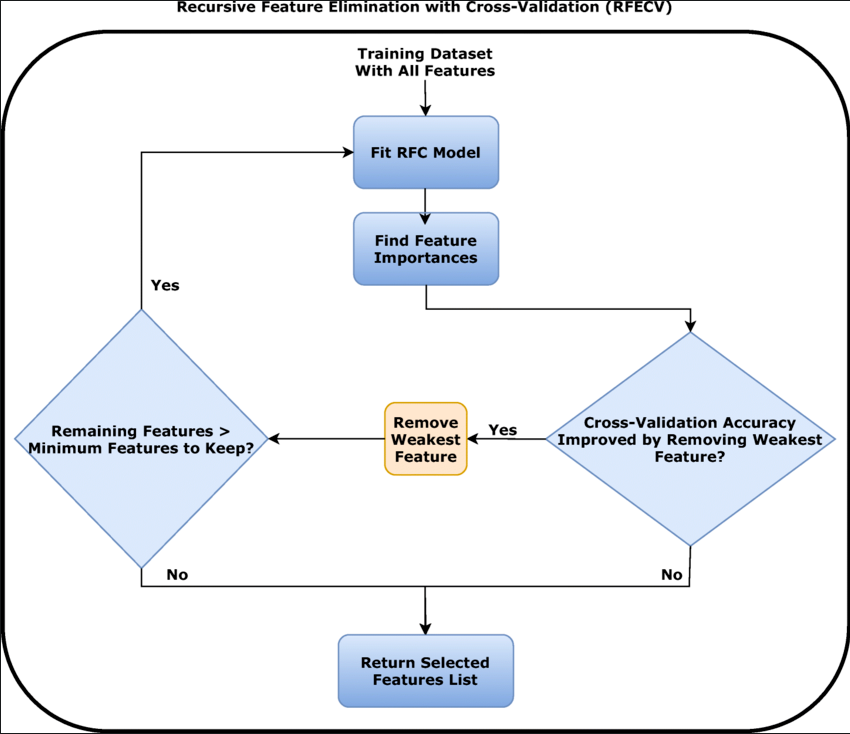

In [35]:
# val_rate = round(X_test.shape[0] / X_train.shape[0] , 2)
# # Just testing about KFold

# splitter = Splitter(kfold=False)
# for X_train_, X_val, y_train_, y_val in splitter.split_data(X_train, y_train, random_state_list=[34]):
#     print('Data set by train_test_split')
#     print(f'X_train Shape {X_train.shape}')
#     print(f'X_val Shape {X_val.shape}')
#     print(f'X_test Shape {X_test.shape}')

Data set by train_test_split
X_train Shape (1062772, 9)
X_val Shape (531386, 9)
X_test Shape (49368, 9)


In [37]:
# #%%time
# def passing():
#     n_estimators = 500
#     scoring = 'neg_mean_absolute_error'
#     min_features_to_select = 6

#     regressor = Regressor(n_estimators, device='cpu', random_state= 34)
#     models = regressor.models

#     models_name = [_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)]
#     trained_models = dict(zip(models_name, ['' for _ in range(regressor.len_models)]))
#     unnecessary_features = dict(zip(models_name, [[] for _ in range(regressor.len_models)]))
#     for name, model in models.items():
#         if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
#             elimination = RFECV(
#                 model, 
#                 step=1,
#                 min_features_to_select=min_features_to_select,
#                 cv=2,
#                 scoring=scoring, 
#                 n_jobs=-1)
#             elimination.fit(X_train_, y_train_)
#             unnecessary_feature = list(X_train.columns[~elimination.get_support()])
#             idx = np.argmax(elimination.cv_results_['mean_test_score'])
#             mean_score = elimination.cv_results_['mean_test_score'][idx]
#             std_score = elimination.cv_results_['std_test_score'][idx]
#             print(f'{blu}{name}{res} {red} Best Mean{res} MAE {red}{mean_score:.5f} ± {std_score:.5f}{res} | N_STEP {idx}')
#             print(f"unnecessary_feature: {unnecessary_feature}")
#             print(f'{"-" * 60}')
            
#             trained_models[f'{name}'] = deepcopy(elimination)
#             unnecessary_features[f'{name}'].extend(unnecessary_feature)
            
#     unnecessary_features = np.concatenate([_ for _ in unnecessary_features.values()])
#     features = np.unique(unnecessary_features, return_counts=True)[0]
#     counts = np.unique(unnecessary_features, return_counts=True)[1]
#     drop_features = list(features[counts >= 2])
#     print("Features recommended to be removed:", drop_features)

In [ ]:
# def plot_recursive_feature_elimination(elimination, scoring, min_features_to_select, name):
#     n_scores = len(elimination.cv_results_["mean_test_score"])
#     plt.figure(figsize=(10, 4))
#     plt.xlabel("Number of features selected")
#     plt.ylabel(f"{scoring}")

#     # Plot the mean test scores with error bars
#     plt.errorbar(
#         range(min_features_to_select, n_scores + min_features_to_select),
#         elimination.cv_results_["mean_test_score"],
#         yerr=elimination.cv_results_["std_test_score"],
#         fmt='o-',
#         capsize=3,
#         markersize=4,
#     )

#     plt.title(f"{name} Recursive Feature Elimination with correlated features", fontweight='bold')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
    
# for name, elimination in trained_models.items():
#     plot_recursive_feature_elimination(elimination, scoring, min_features_to_select, name)

# Weighted Ensemble by Optuna on Training

A weighted average is performed during training;

The weights were determined for each model using the predictions for the train data created in the out of fold with Optuna's CMAsampler. (Here it is defined by OptunaWeights)

This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.

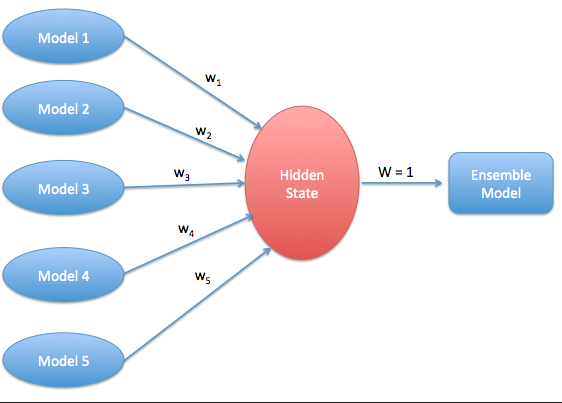

# Optimizer(--> Optimize MAE)

In [24]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=100):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-15, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        score = mean_absolute_error(y_true, weighted_pred)
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [25]:
# Settings
kfold = True
n_splits = 5 # 10
n_reapts = 1 # 1
random_state = 34 # Istanbul :)
n_estimators = 99999 # 99999
early_stopping_rounds = 400 # 100-500
n_trials = 2000 # 3000
verbose = False
device = 'gpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# To calculate runtime
def sec_to_minsec(t):
    min_ = int(t / 60)
    sec = int(t - min_*60)
    return min_, sec

In [26]:
X_train.shape

(1062774, 9)

In [27]:
X_test.shape

(49368, 9)

In [28]:
%%time

# Initialize an array for storing test predictions
regressor = Regressor(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(regressor.len_models)]))
score_dict = dict(zip(regressor.models_name, [[] for _ in range(regressor.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of regressor models
    regressor = Regressor(n_estimators, device, random_state_list[m])
    models = regressor.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] MAE {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = mean_absolute_error(y_val, y_val_pred)
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] MAE {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
    gc.collect()

xgb [FOLD-0 SEED-8666] MAE 0.12131 | Best iteration 875 | 3min 3s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
lgb [FOLD-0 SEED-8666] MAE 0.11894 | Best iteration 3203 | 2min 2s
cat [FOLD-0 SEED-8666] MAE 0.11903 | Best iteration 3285 | 3min 2s
hgb [FOLD-0 SEED-8666] MAE 0.11942 | Best iteration None | 4min 14s
>>> Ensemble [FOLD-0 SEED-8666] MAE 0.11881
------------------------------------------------------------
xgb [FOLD-1 SEED-8666] MAE 0.12162 | Best iteration 883 | 2min 56s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
lgb [FOLD-1 SEED-8666] MAE 0.11908 | Best iteration 4210 | 2min 33s
cat [FOLD-1 SEED-8666] MAE 0.11928 | Best iteration 3451 | 3min 39s
hgb [FOLD-1 SEED-8666] MAE 0.12093 | Best iteration None | 3min 25s
>>> Ensemble [FOLD-1 SEED-8666] MAE 0.11899
------------------------------------------------------------
xgb

In [36]:
test_predss

array([2.00142697, 2.07900565, 2.32160196, ..., 2.5589286 , 2.24363275,
       2.41627421])

In [37]:
if CFG.log_target_encoder:
    y_train = np.exp(y_train)
    test_predss = np.exp(test_predss)
    oof_predss = np.exp(oof_predss)
    test_preds = np.exp(test_preds)
    oof_preds = np.exp(oof_preds)
    test_pred = np.exp(test_pred)
    y_val_pred = np.exp(y_val_pred)

In [38]:
test_predss

array([ 7.39960762,  7.99651361, 10.19198844, ..., 12.92196534,
        9.42751699, 11.20403753])

# Mean Scores for each Model

--- Mean MAE Scores---
xgb: 0.12153 ± 0.00030
lgb: 0.11911 ± 0.00035
cat: 0.11924 ± 0.00034
hgb: 0.12034 ± 0.00067


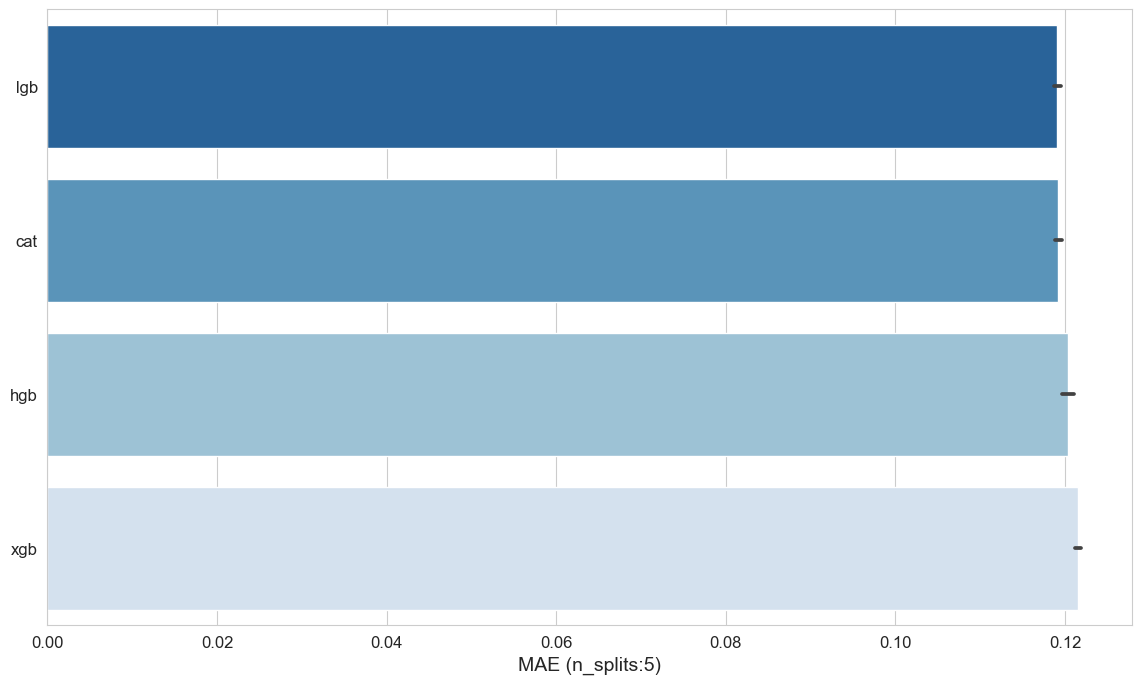

In [39]:
def plot_score_from_dict(score_dict, title='MAE', ascending=True):
    score_df = pd.melt(pd.DataFrame(score_dict))
    score_df = score_df.sort_values('value', ascending=ascending)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='value', y='variable', data=score_df, palette='Blues_r', errorbar='sd')
    plt.xlabel(f'{title}', fontsize=14)
    plt.ylabel('')
    #plt.title(f'{title}', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='x')

    plt.show()

print('--- Mean MAE Scores---')    
for name, score in score_dict.items():
    mean_score = np.mean(score)
    std_score = np.std(score)
    print(f'{name}: {red}{mean_score:.5f} ± {std_score:.5f}{res}')
plot_score_from_dict(score_dict, title=f'MAE (n_splits:{n_splits})')

Mean Optuna Ensemble MAE 0.11900 ± 0.00035

--- Optuna Weights---
xgb: 0.00009 ± 0.00013
lgb: 0.78758 ± 0.20483
cat: 0.55956 ± 0.19519
hgb: 0.00007 ± 0.00006


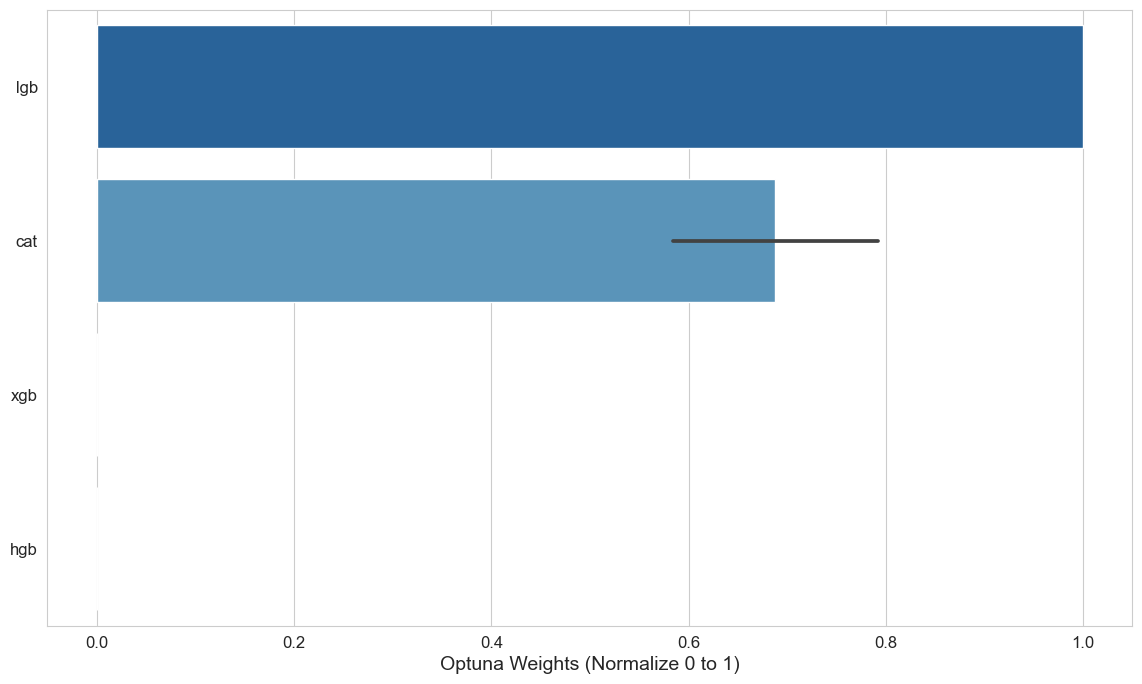

In [41]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'{red}Mean{res} Optuna Ensemble MAE {red}{mean_score:.5f} ± {std_score:.5f}{res}')

print('')
# Print the mean and standard deviation of the ensemble weights for each model
print('--- Optuna Weights---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {blu}{mean_weight:.5f} ± {std_weight:.5f}{res}')

# weight_dict = dict(zip(list(score_dict.keys()), np.array(weights).T.tolist()))
# plot_score_from_dict(weight_dict, title='Model Weights', ascending=False)
normalize = [((weight - np.min(weight)) / (np.max(weight) - np.min(weight))).tolist() for weight in weights]
weight_dict = dict(zip(list(score_dict.keys()), np.array(normalize).T.tolist()))
plot_score_from_dict(weight_dict, title='Optuna Weights (Normalize 0 to 1)', ascending=False)

In [ ]:
# def visualize_importance(models, feature_cols, title, top=9):
#     importances = []
#     feature_importance = pd.DataFrame()
#     for i, model in enumerate(models):
#         _df = pd.DataFrame()
#         _df["importance"] = model.feature_importances_
#         _df["feature"] = pd.Series(feature_cols)
#         _df["fold"] = i
#         _df = _df.sort_values('importance', ascending=False)
#         _df = _df.head(top)
#         feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
#     feature_importance = feature_importance.sort_values('importance', ascending=False)
#     # display(feature_importance.groupby(["feature"]).mean().reset_index().drop('fold', axis=1))
#     plt.figure(figsize=(12, 4))
#     sns.barplot(x='importance', y='feature', data=feature_importance, color='skyblue', errorbar='sd')
#     plt.xlabel('Importance', fontsize=14)
#     plt.ylabel('Feature', fontsize=14)
#     plt.title(f'{title} Feature Importance', fontsize=18)
#     plt.grid(True, axis='x')
#     plt.show()
    
# for name, models in trained_models.items():
#     if name in list(trained_models.keys()):
#         visualize_importance(models, list(X_train.columns), name)

# Make Submission

mattop_post_process takes a list of predictions and returns an array of target values. 

It calculates the absolute difference between each prediction and all target values, and then selects the target value with the smallest difference for each prediction.
Reference: https://www.kaggle.com/competitions/playground-series-s3e14/discussion/407327

Or you can do just rounded_process and you round your predicts to integer.

Note : It was almost have the same scores

In [43]:
unique_targets = np.unique(y_train)

if CFG.largeScale:
     unique_targets = np.concatenate((unique_targets, np.array([(max(unique_targets) + 1) , (max(unique_targets) + 2) , (max(unique_targets) + 3) , (max(unique_targets) + 4) , (max(unique_targets) + 5)])))

if CFG.mattop_post_process :
     def mattop_post_process(preds):
          return np.array([min(unique_targets, key = lambda x: abs(x - pred)) for pred in preds])
     
     
if CFG.rounded_process:
     def rounded_process(preds):
          return np.array([round(pred) for pred in preds])

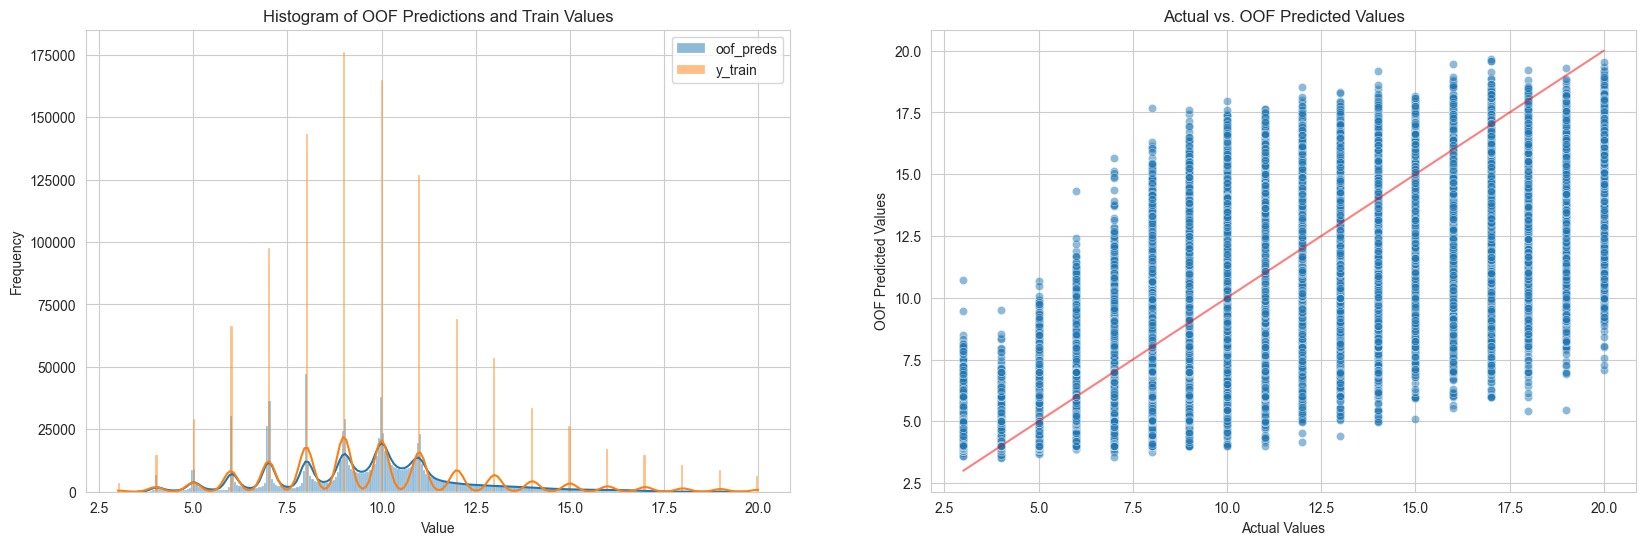

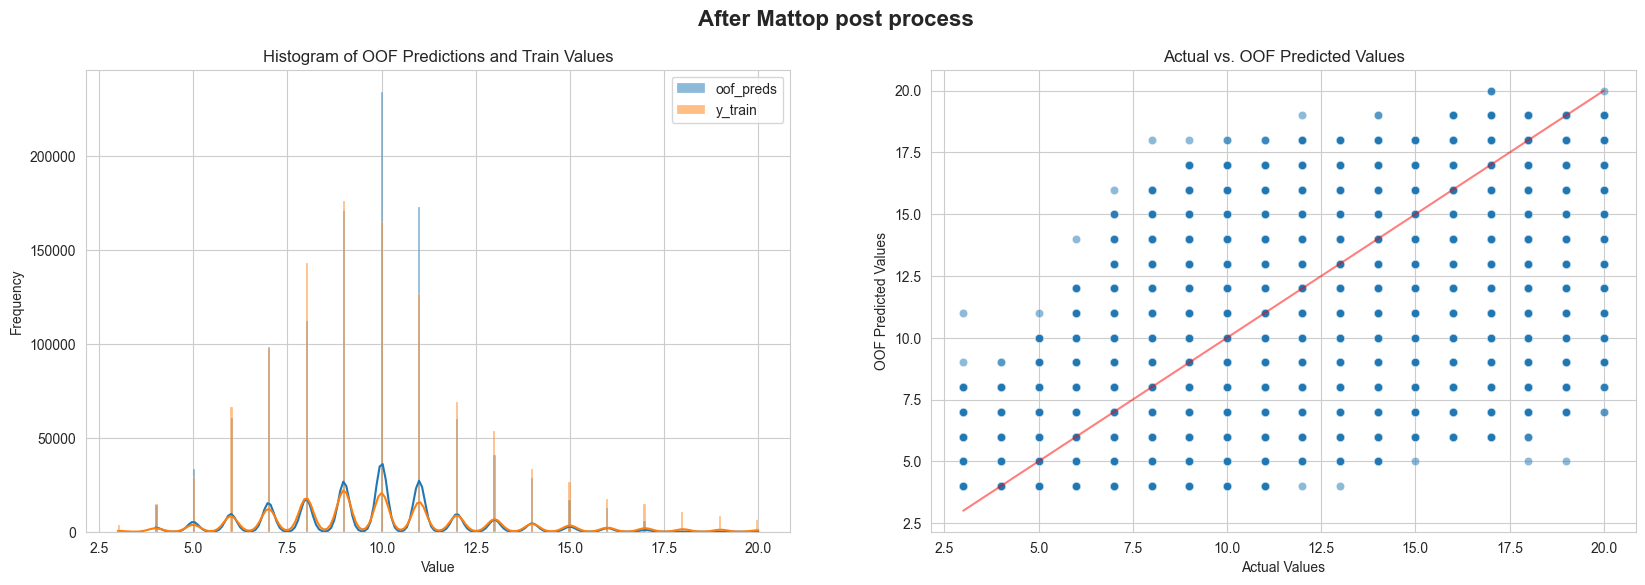

In [44]:
def oof_result(oof_preds, y_train, title):
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(oof_preds, kde=True, alpha=0.5, label='oof_preds')
    sns.histplot(y_train.values, kde=True, alpha=0.5, label='y_train')
    plt.title('Histogram of OOF Predictions and Train Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_train.values, y=oof_preds, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('OOF Predicted Values')
    plt.title('Actual vs. OOF Predicted Values')
    plt.suptitle(f'{title}', fontweight='bold', fontsize=16)

    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', alpha=0.5)
    plt.show()
  
if CFG.mattop_post_process: 
    oof_result(np.mean(oof_predss, axis=1), y_train, title='')
    oof_result(mattop_post_process(np.mean(oof_predss, axis=1)), y_train, title='After Mattop post process')

In [45]:
subs = pd.DataFrame()

sub = pd.read_csv(os.path.join(filepath, 'sample_submission.csv'))
sub[f'{target_col}'] = test_predss
sub.to_csv('submission.csv', index=False)

subs = pd.concat([subs, sub], axis=1)

sub = pd.read_csv(os.path.join(filepath, 'sample_submission.csv'))

if CFG.mattop_post_process:
    sub[f'{target_col}'] = mattop_post_process(test_predss)
    
if CFG.rounded_process:
    sub[f'{target_col}'] = rounded_process(test_predss)
    
sub.to_csv('results/Typical4Models+1000k+Weight+DropBigAge20_DropSmallAges3.csv', index=False)

pd.merge(subs, sub, on='id', suffixes=("", "_mattop"))

id        Age  Age_mattop
0       74051   7.399608         7.0
1       74052   7.996514         8.0
2       74053  10.191988        10.0
3       74054   9.274632         9.0
4       74055   7.106955         7.0
...       ...        ...         ...
49363  123414   8.525997         9.0
49364  123415   7.937361         8.0
49365  123416  12.921965        13.0
49366  123417   9.427517         9.0
49367  123418  11.204038        11.0

[49368 rows x 3 columns]

In [ ]:
# Done.

# Final Compare (Optional)

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import jaccard_score

In [ ]:
def pearson_compare(df1 , df2 , feature = 'Age'):

    df1_values = df1[feature].values
    df2_values = df2[feature].values
    
    # Pearson korelasyon katsayısı hesaplama
    correlation, _ = pearsonr(df1_values, df2_values)
    
    return correlation
    
  
def jaccard_compare(df1 , df2 , feature = 'Age'):

    df1_values = df1[feature].values
    df2_values = df2[feature].values
    
    # Jaccard benzerlik katsayısı hesaplama
    jaccard_similarity = jaccard_score(df1_values, df2_values , average='weighted')
    
    return jaccard_similarity


In [ ]:
def find_identical_rows(df1, df2):
    merged = df1.merge(df2, on="id", suffixes=("_df1", "_df2"))
    identical_rows = (merged.loc[merged["Age_df1"] == merged["Age_df2"], "id"]).values
    return identical_rows

def find_different_rows(df1, df2):
    merged = df1.merge(df2, on="id", suffixes=("_df1", "_df2"))
    different_rows = (merged.loc[merged["Age_df1"] != merged["Age_df2"], "id"]).values
    return different_rows

In [ ]:
def compare_age_values(df1, df2, different_ids):
    df1_selected = df1.loc[different_ids].reset_index(drop=True)
    df2_selected = df2.loc[different_ids].reset_index(drop=True)
    
    compared_data = pd.concat([df1_selected["Age"], df2_selected["Age"]], axis=1)
    compared_data.columns = ["Age_df1", "Age_df2"]
    
    return compared_data

In [ ]:
def compare_age_values2(df1, df2, different_ids):
    common_ids = set(df1["id"]).intersection(set(df2["id"]))
    valid_ids = [idx for idx in different_ids if idx in common_ids]
    
    if len(valid_ids) == 0:
        print("No valid ids found.")
        return None
    
    df1_selected = df1[df1["id"].isin(valid_ids)].reset_index(drop=True)
    df2_selected = df2[df2["id"].isin(valid_ids)].reset_index(drop=True)
    
    compared_data = pd.concat([df1_selected["Age"], df2_selected["Age"]], axis=1)
    compared_data.columns = ["Age_df1", "Age_df2"]
    
    return compared_data

In [ ]:
df1 = pd.read_csv(r'C:\Users\Emincan\Desktop\Playgrounds\Playgrounds3-16(Regression)\Subs_New\Typical4Models+1000k+Weight+DropBigAge19_DropSmallAges4_Simple\Typical4Models+1000k+Weight+DropBigAge19_DropSmallAges4_Simple.csv')
df2 = pd.read_csv(r'C:\Users\Emincan\Desktop\Playgrounds\Playgrounds3-16(Regression)\Subs_New\Typical4Models + 500k + Weight + DropBigAge19_DropAllAnomalys_Mattop_0.11878-0.00023\Typical4Models + 500k + Weight + DropBigAge19_DropAllAnomalys_Mattop_0.11878-0.00023.csv')

df1['Age'] = df1.Age.apply(lambda x : int(x)).astype(int)
df2['Age'] = df2.Age.apply(lambda x : int(x)).astype(int)

print(pearson_compare(df1,df2))
print(jaccard_compare(df1,df2))

In [ ]:
find_different_rows(df1 , df2)

In [ ]:
df1[df1['id'] == 74075]

In [ ]:
df2[df2['id'] == 74075]

In [ ]:
# df_train['Age'].value_counts()

In [ ]:
# original['Age'].value_counts()

In [ ]:
# synthetic['Age'].value_counts()

In [ ]:
# Done.